In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [4]:
df = pd.read_csv('Marketing_data.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data explanation 
CUSTID: Identification of Credit Card holder     
BALANCE: Balance amount left in customer's account to make purchases    
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
PURCHASES: Amount of purchases made from account  
ONEOFFPURCHASES: Maximum purchase amount done in one-go  
INSTALLMENTS_PURCHASES: Amount of purchase done in installment  
CASH_ADVANCE: Cash in advance given by the user  
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid  
CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"  
PURCHASES_TRX: Number of purchase transactions made  
CREDIT_LIMIT: Limit of Credit Card for user  
PAYMENTS: Amount of Payment done by user  
MINIMUM_PAYMENTS: Minimum amount of payments made by user    
PRC_FULL_PAYMENT: Percent of full payment paid by user  
TENURE: Tenure of credit card service for user  

In [6]:
df.shape

(8950, 18)

### Find missing values

In [7]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: CREDIT_LIMIT 입니다
해당 컬럼에 총 1 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: MINIMUM_PAYMENTS 입니다
해당 컬럼에 총 313 개의 결측치가 존재합니다.


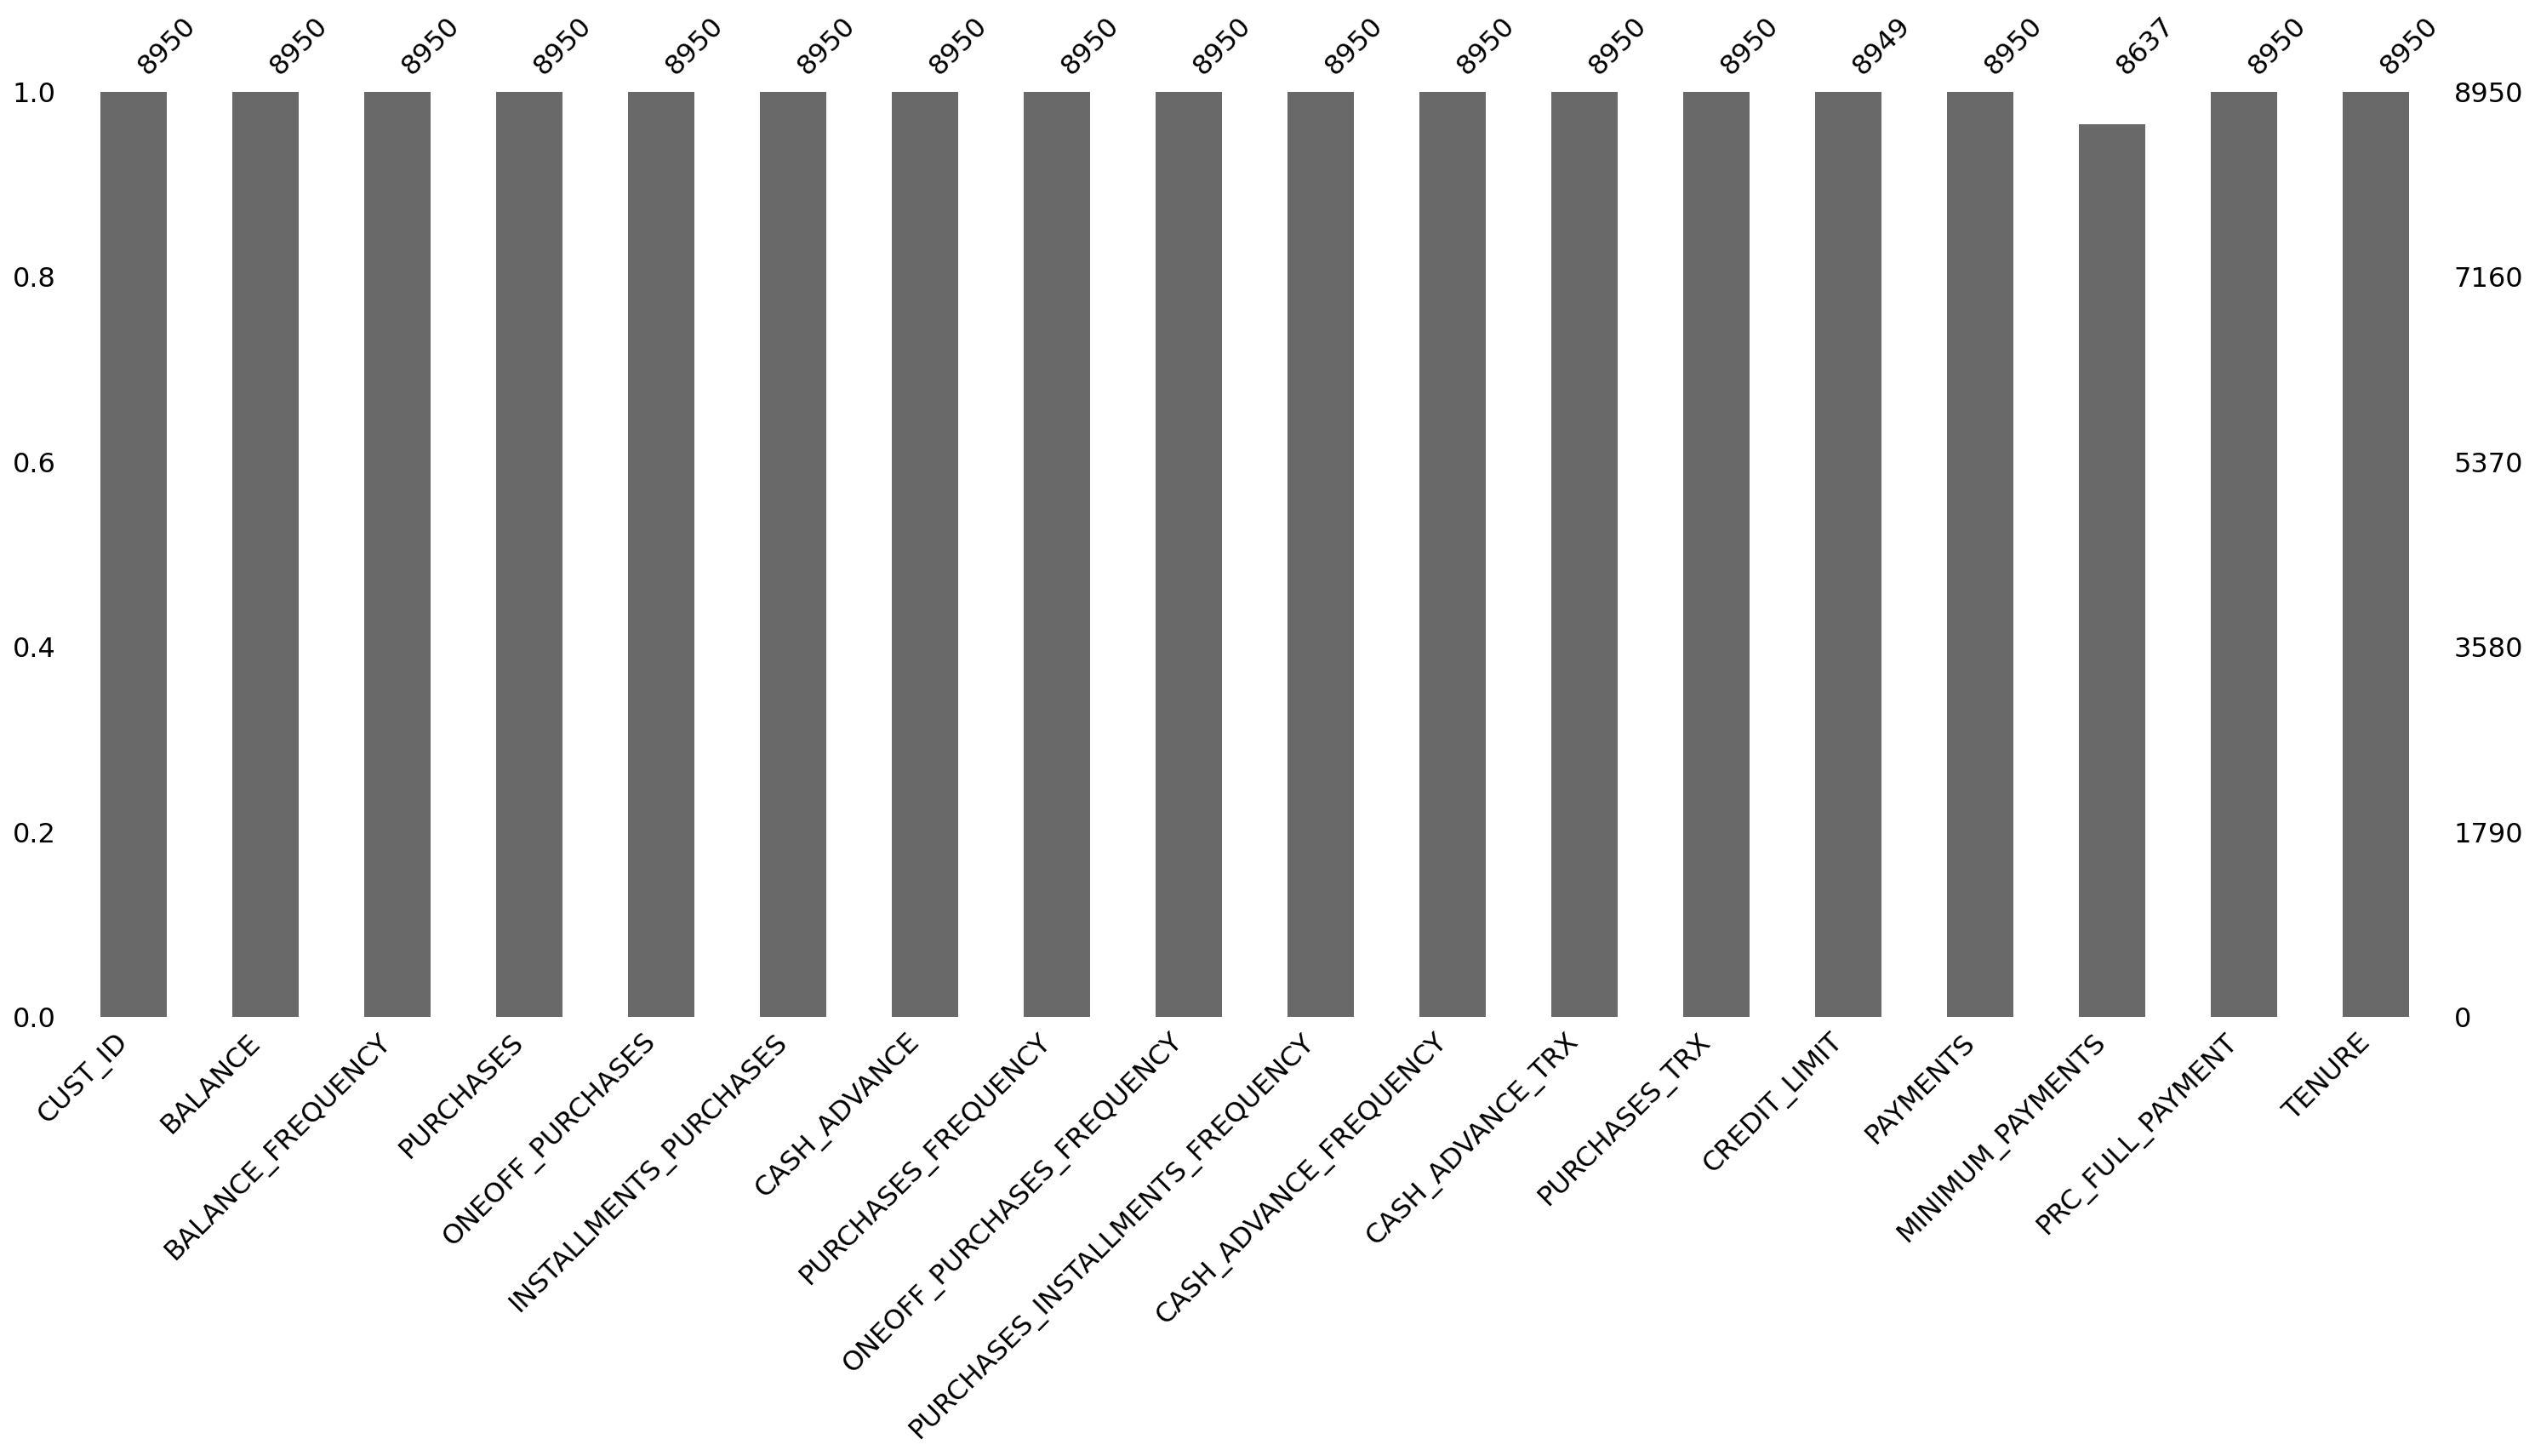

In [8]:
msno.bar(df)
plt.show()

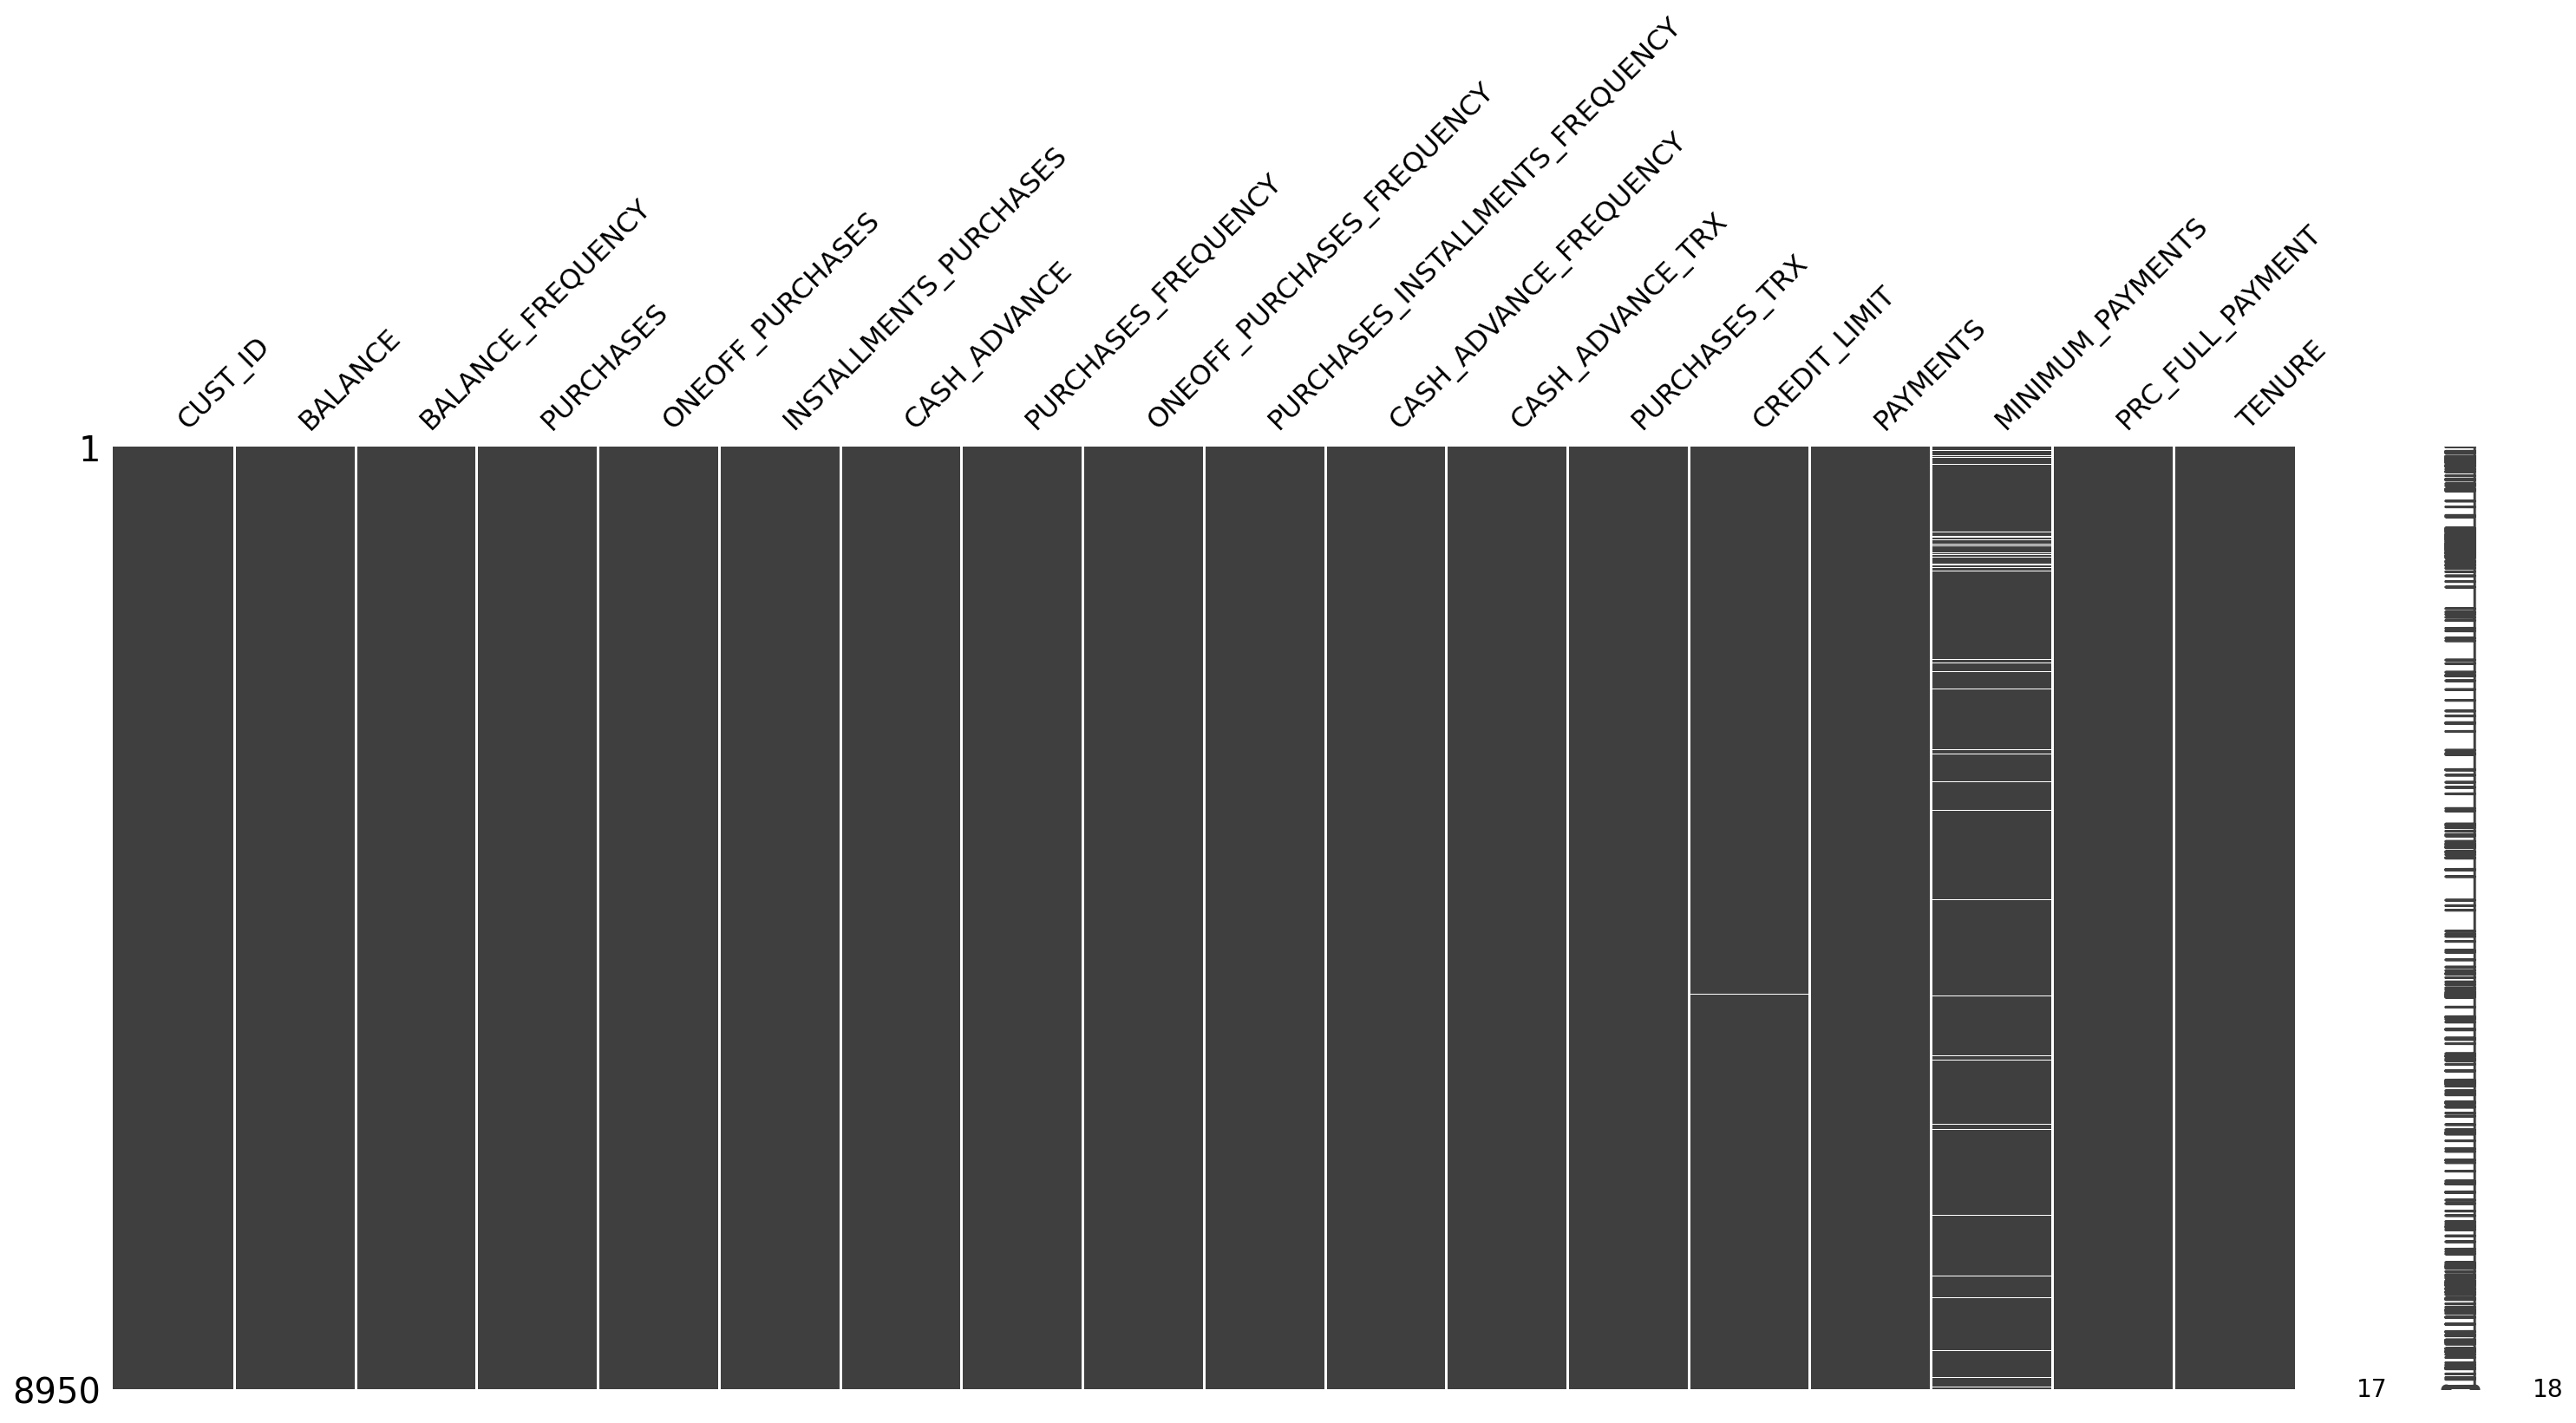

In [9]:
msno.matrix(df)
plt.show()

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [11]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True) ,'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#drop Customer ID since it has no meaning here 
df.drop("CUST_ID", axis = 1, inplace= True)

In [14]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [15]:
df[df['ONEOFF_PURCHASES'] == 40761.25]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [16]:
df['CASH_ADVANCE'].max()

47137.21176

In [17]:
df[df['CASH_ADVANCE'] == 47137.211760000006]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

### Visualization 

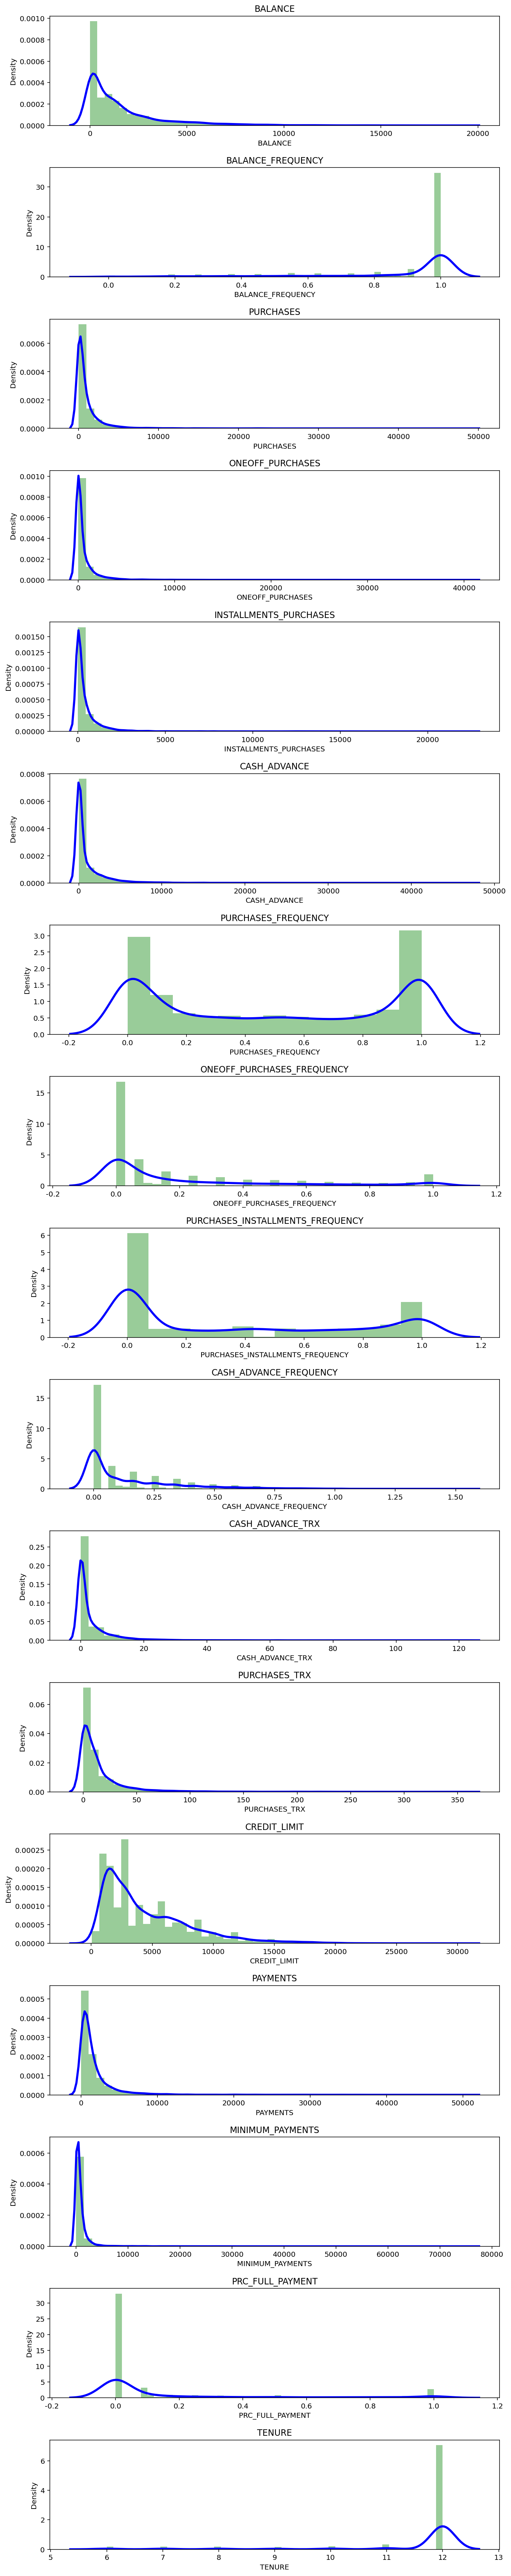

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize = (10,50))
for i in range(len(df.columns)) :
    plt.subplot(17, 1 , i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])
    
plt.tight_layout()
plt.show()

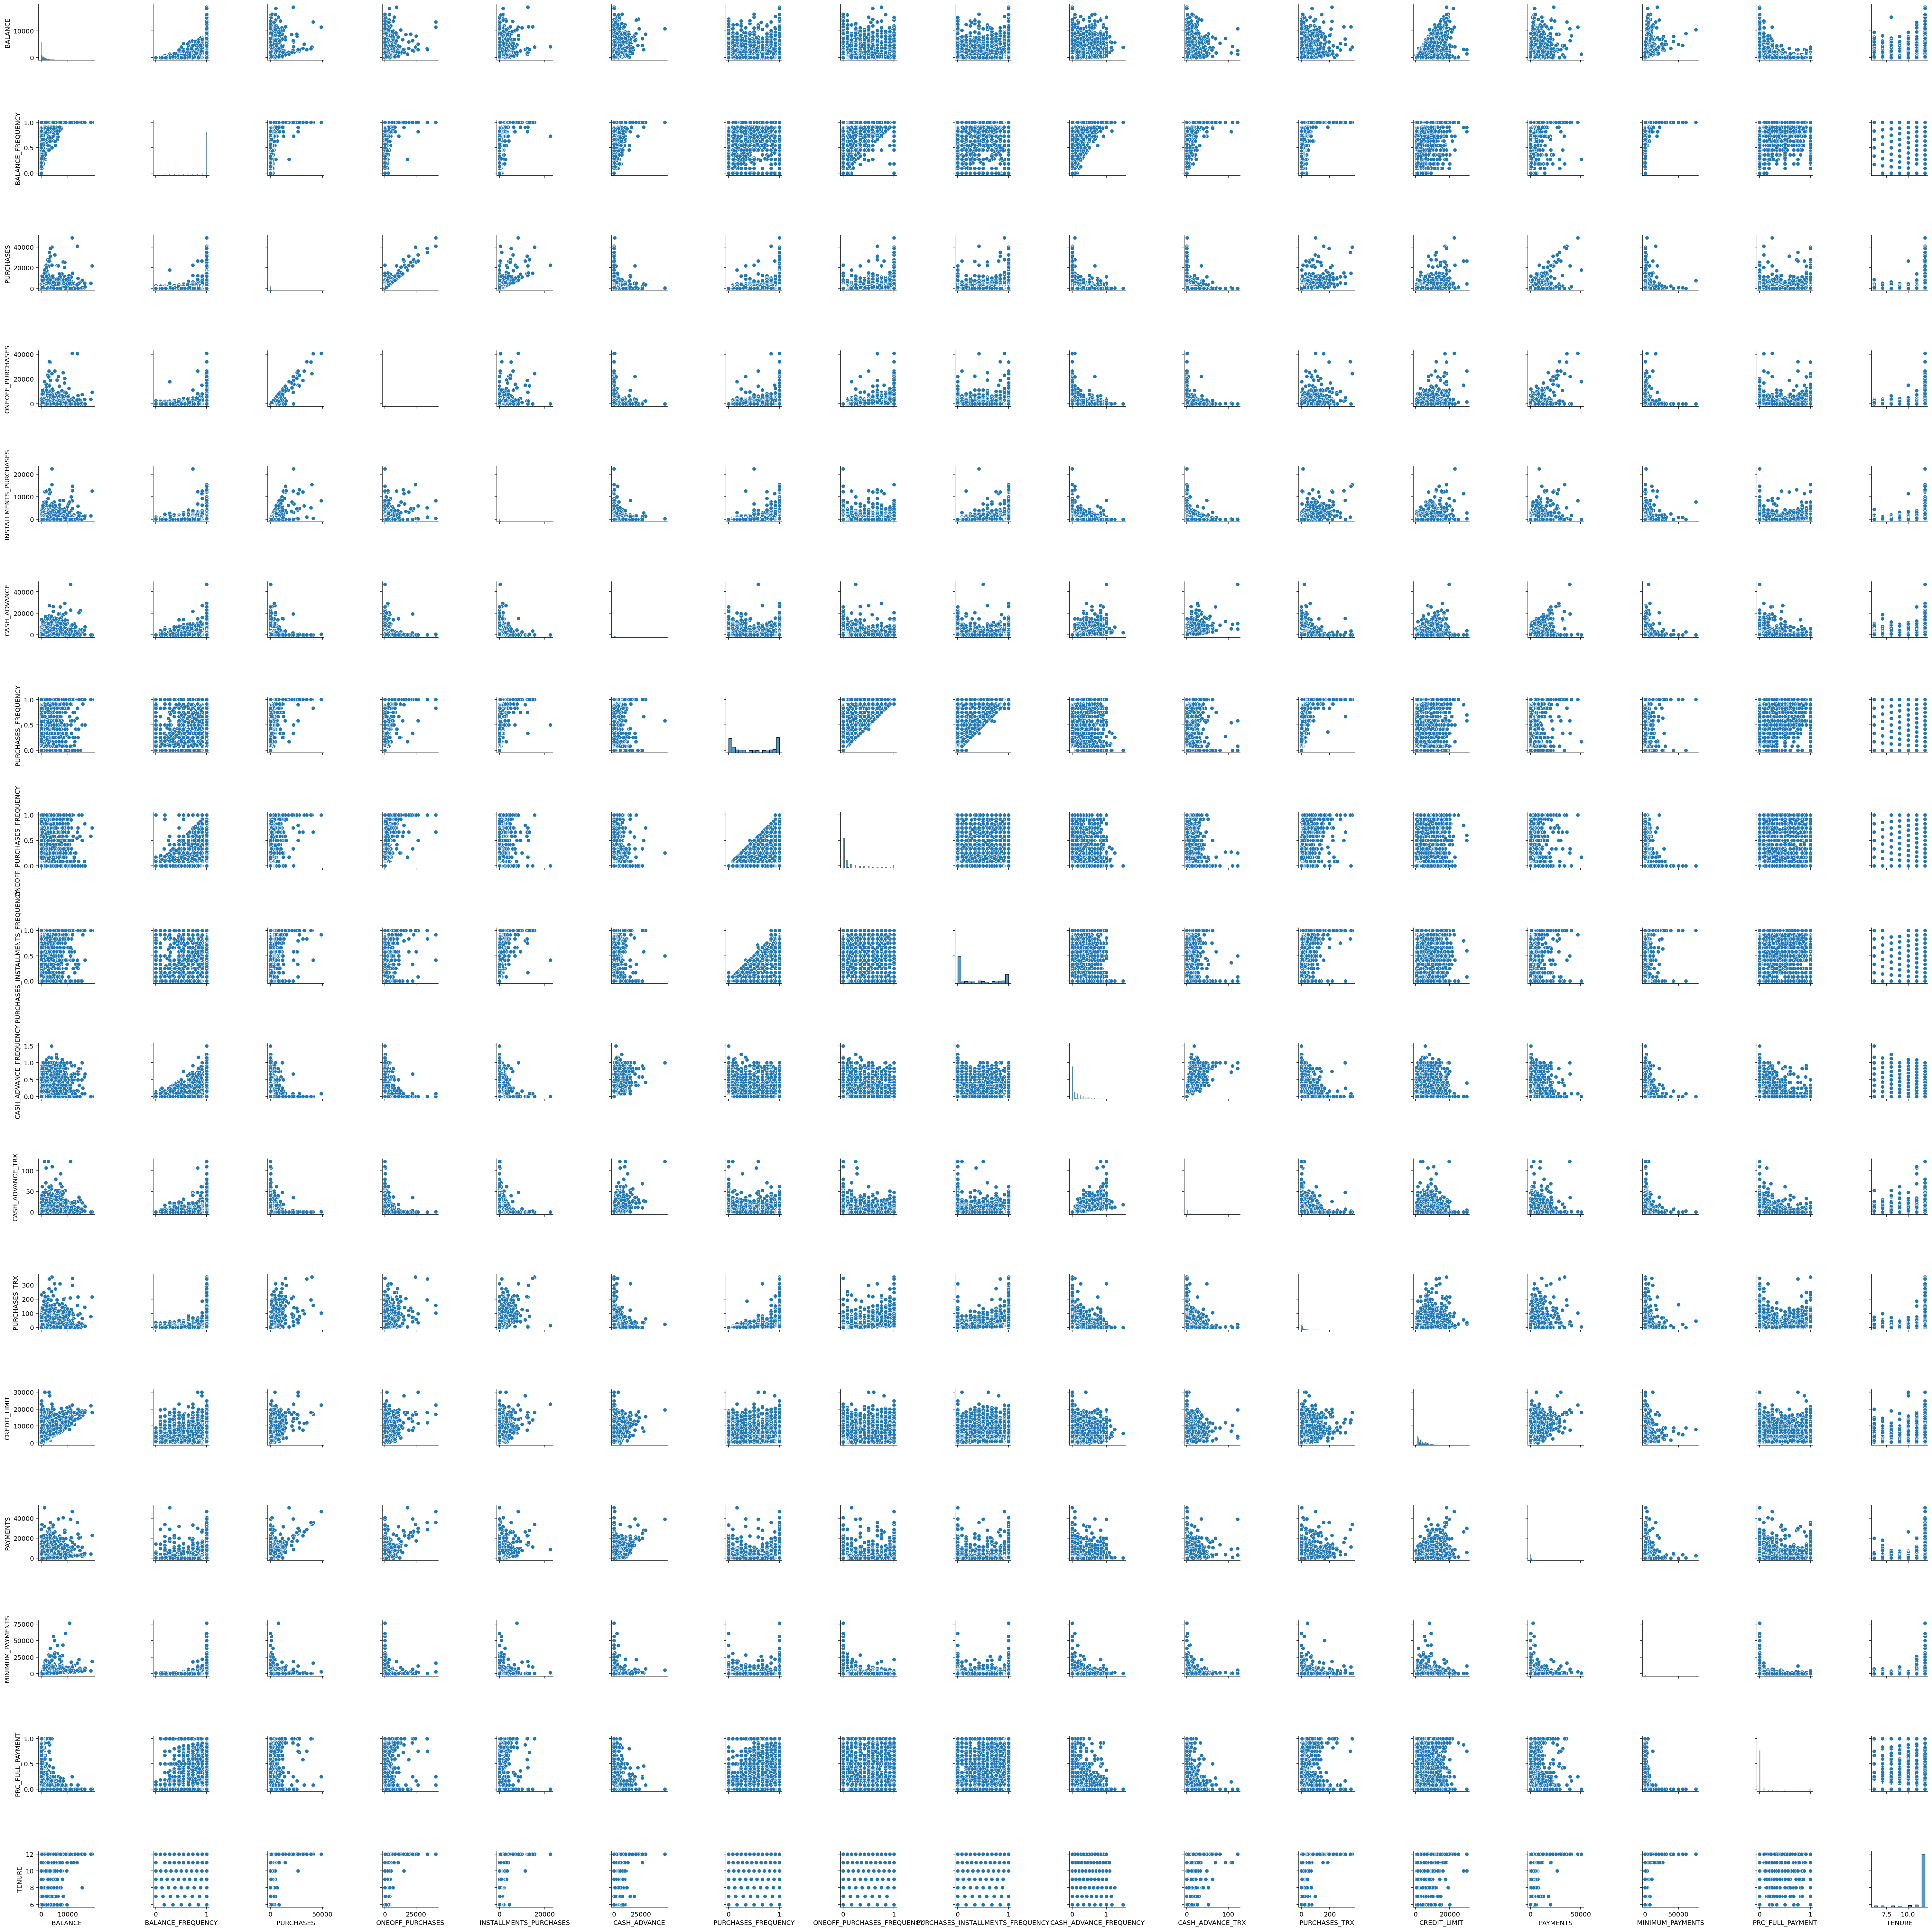

In [19]:
sns.pairplot(df)
plt.show()
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


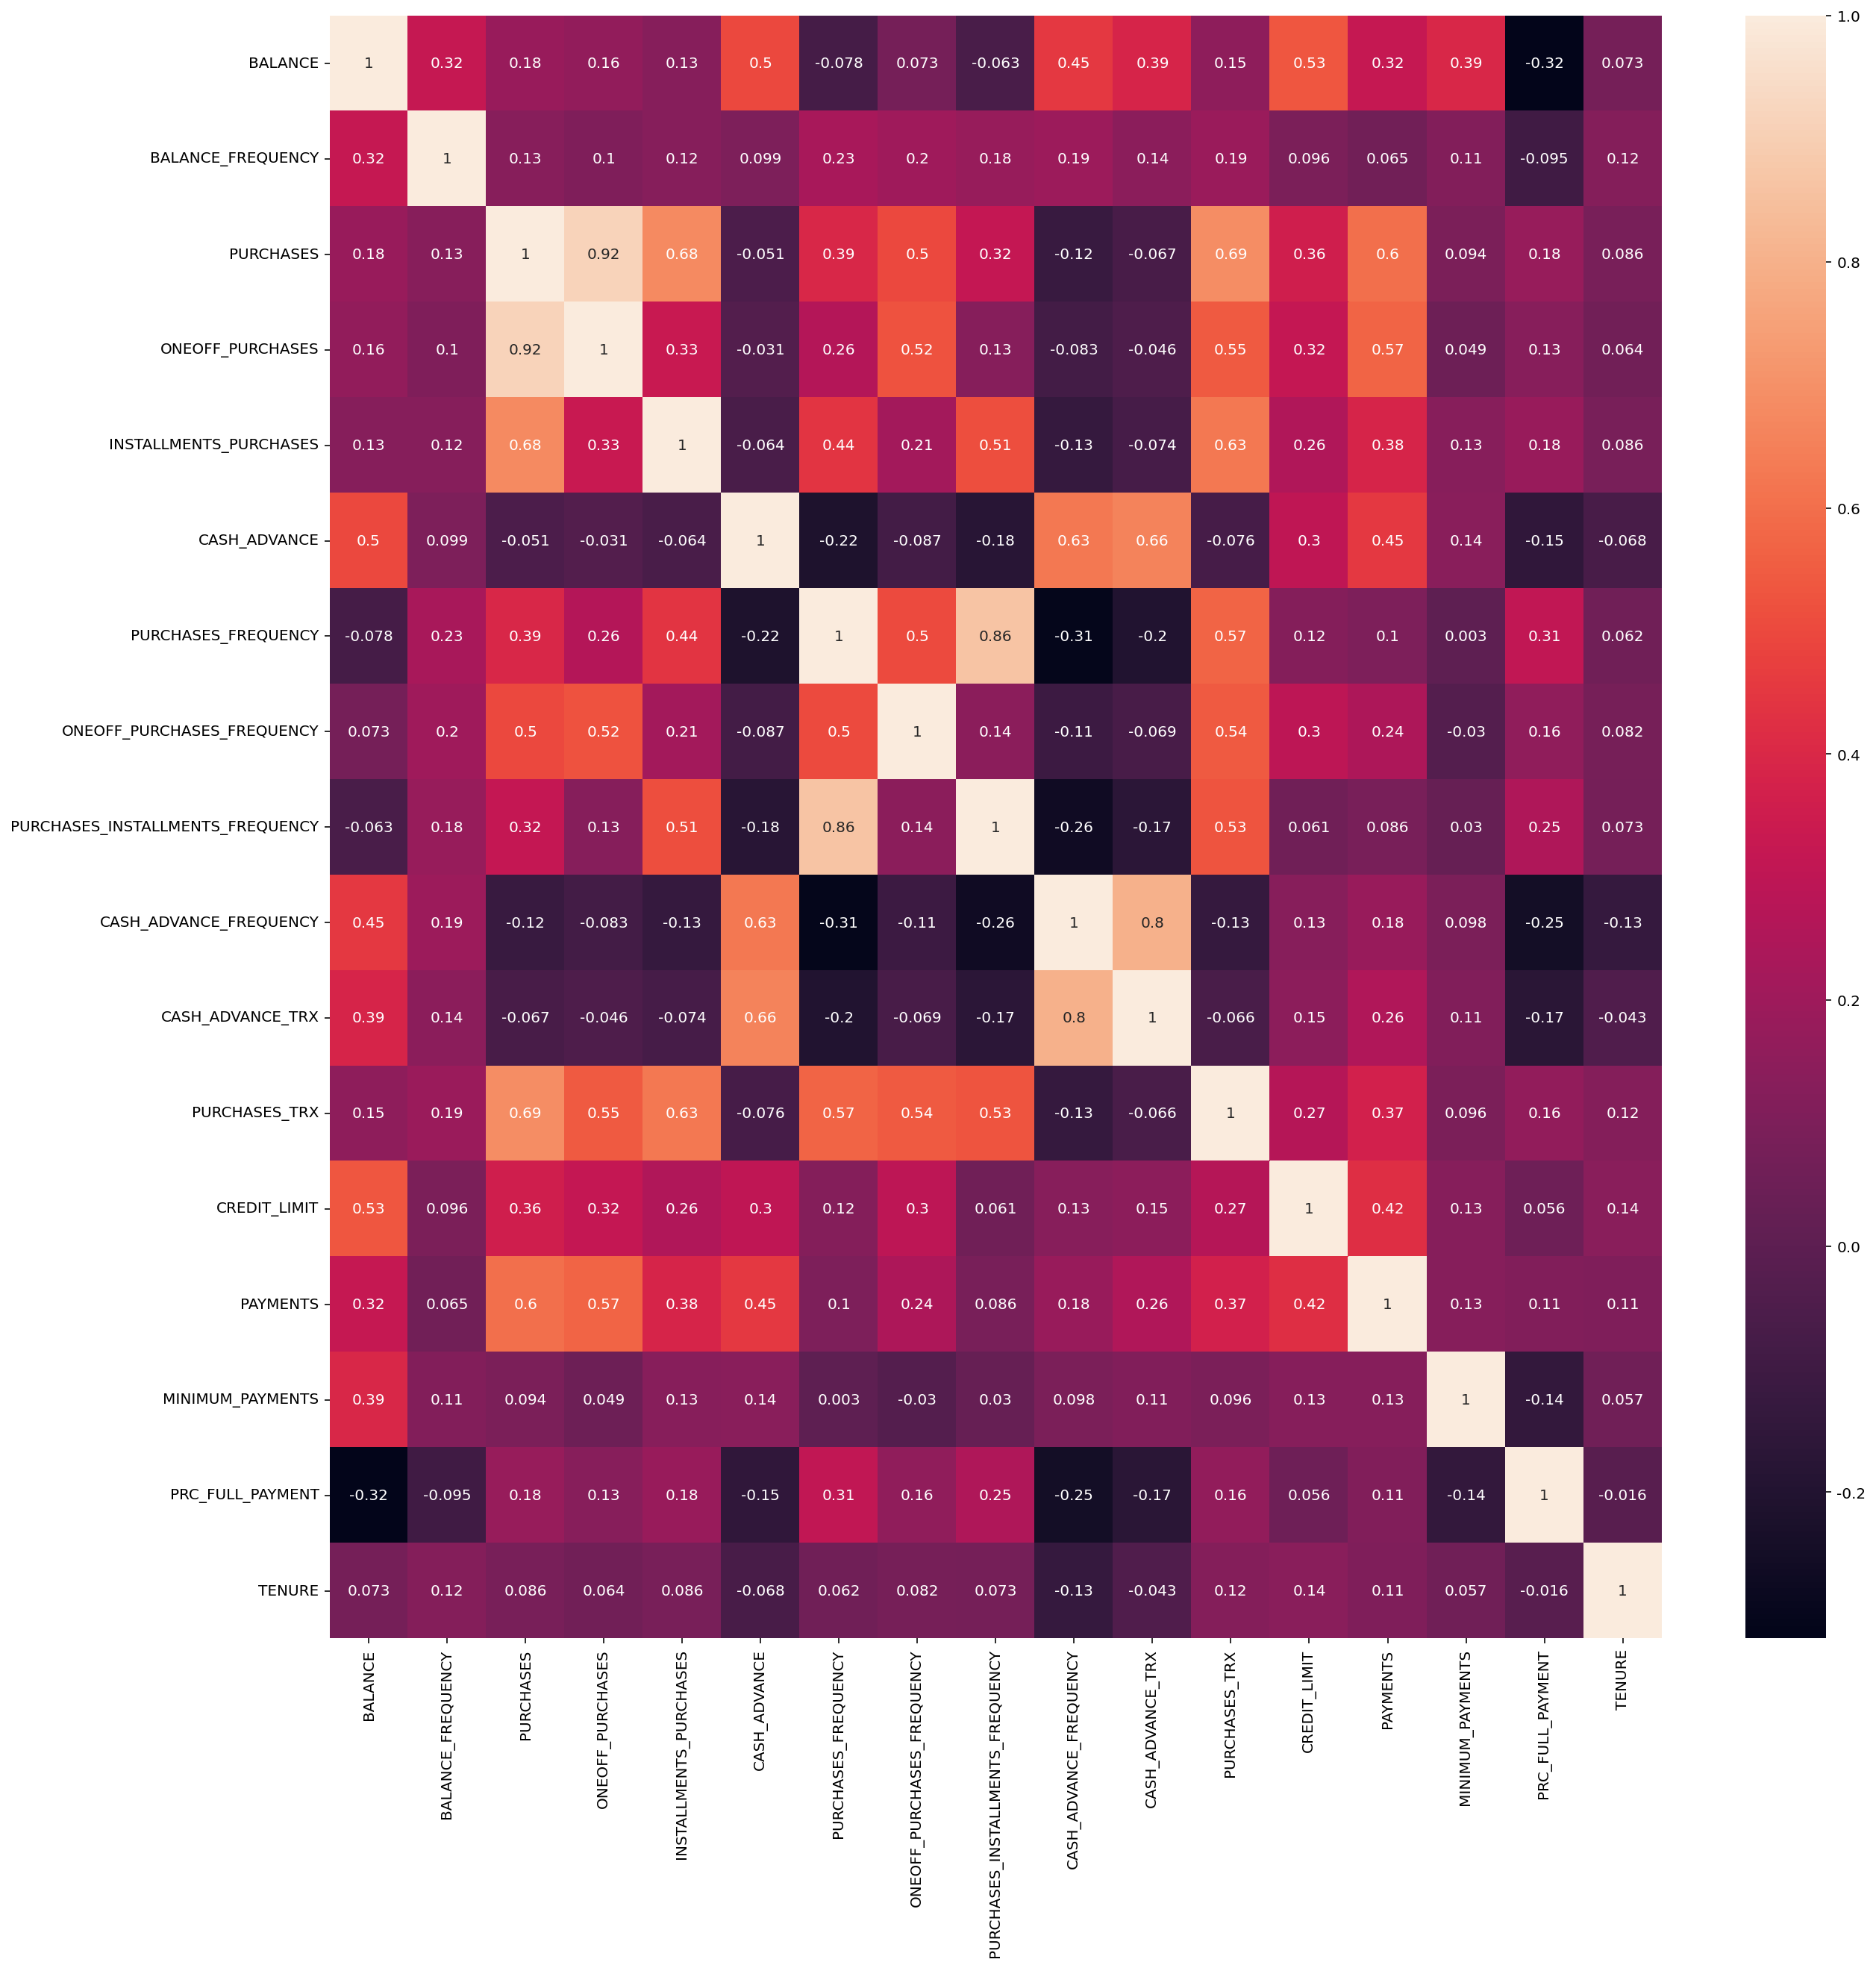

In [20]:
correlations =df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()

### Find the optimal num of clusters using elbow method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 

In [21]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
s = StandardScaler()
df_s = s.fit_transform(df)

In [23]:
df_s[:1]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954]])

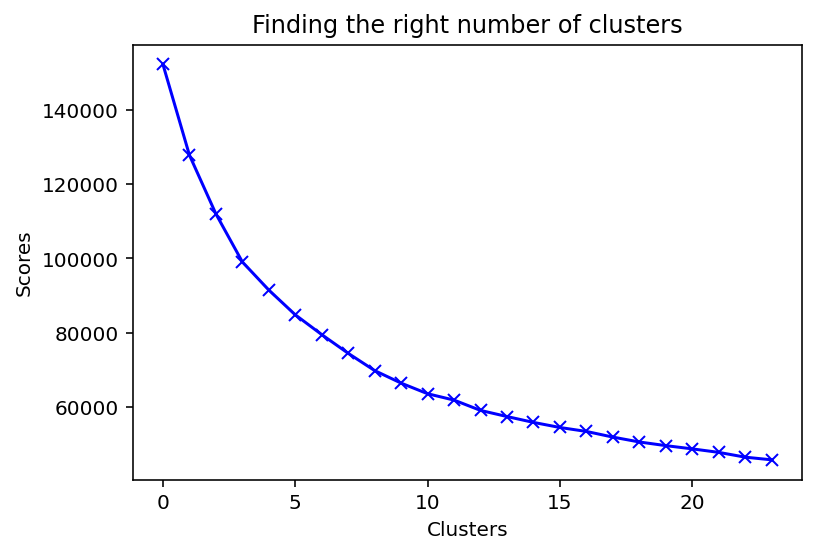

In [24]:
scores_1 = []

range_values = range(1, 25)

for i in range_values :
    kmeans = KMeans(n_clusters= i )
    kmeans.fit(df_s)
    # intertia_ = wcss
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()



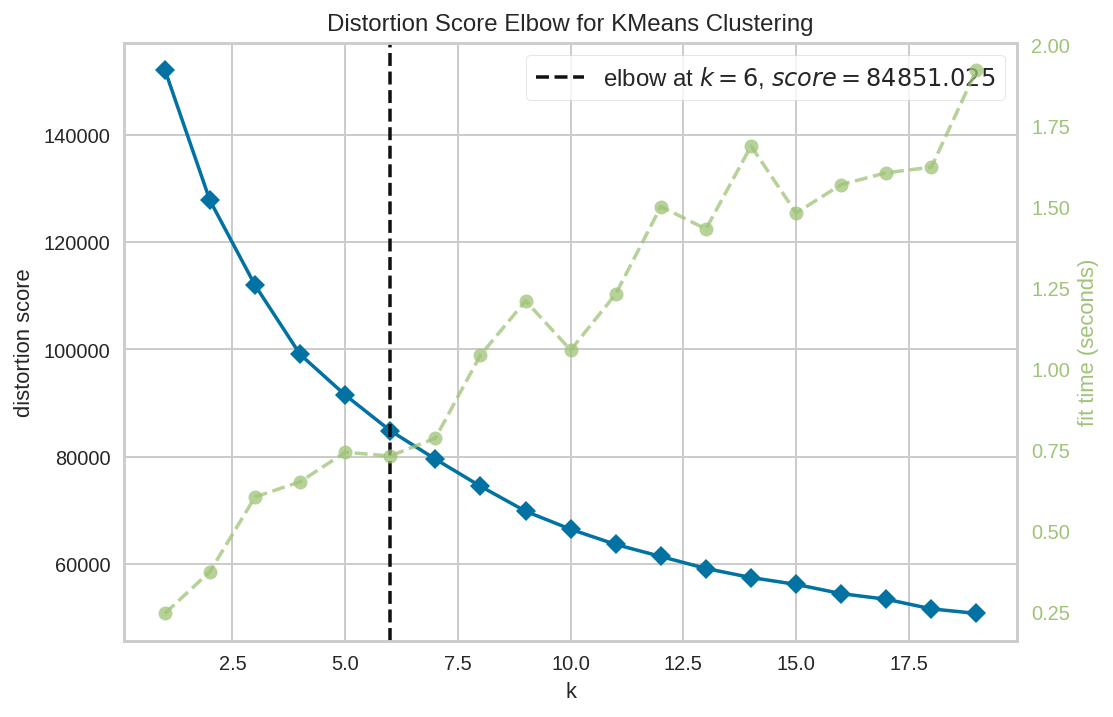

In [25]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(df_s)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Apply K-means method

In [26]:
kmeans = KMeans(6)
kmeans.fit(df_s)
labels = kmeans.labels_

* centroid - 데이터의 평균값을 이용
* clusteroid - 클러스터 내 점들과 가장 가까운점(데이터셋에 있는 좌표)

In [27]:
kmeans.cluster_centers_.shape

(6, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.396865          0.308323 -0.067365        -0.244767   
1  1.591479          0.376997 -0.204185        -0.148783   
2  0.137676          0.427207  0.926437         0.877387   
3 -0.697844         -2.121553 -0.313038        -0.231015   
4  1.443847          0.414656  7.093187         6.244031   
5 -0.010281          0.372121 -0.345349        -0.223850   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.290363    -0.365854            0.964682   
1              -0.209546     1.949748           -0.449498   
2               0.578596    -0.309096            1.087856   
3              -0.315659    -0.306912           -0.560037   
4               5.297641     0.004274            1.081960   
5              -0.405221    -0.081714           -0.826548   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.376324                         1.139229   
1                  -0.183691                        -0.406362   
2                   1.838892                         0.542908   
3                  -0.418705                        -0.465064   
4                   1.867817                         1.035380   
5                  -0.335680                        -0.770855   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.463438        -0.358105      0.122143    -0.329833   
1               1.901136         1.855405     -0.244017     0.963871   
2              -0.405671        -0.318458      1.184038     0.692399   
3              -0.484403        -0.357813     -0.425746    -0.209329   
4              -0.299540        -0.116878      4.699112     2.171463   
5               0.131981        -0.028270     -0.470705    -0.332477   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.251488        -0.056038         0.340692 -0.025166  
1  0.776815         0.512337        -0.391139 -0.089840  
2  0.380207        -0.024143         0.435885  0.271440  
3 -0.221025        -0.256015         0.261571 -0.165980  
4  4.847281         1.104788         0.830765  0.333341  
5 -0.262070        -0.029880        -0.451012 -0.008641

In [29]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = s.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   738.433679          0.950310    859.277602       186.173496   
1  4877.004640          0.966578    566.960000       345.487536   
2  1851.036530          0.978472   2982.551670      2048.720612   
3   111.971653          0.374694    334.395004       209.000465   
4  4569.720859          0.975499  16157.907683     10956.249146   
5  1543.075446          0.965423    265.361154       220.892134   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             673.638969   211.658792            0.877524   
1             221.578150  5067.584105            0.309945   
2             934.284573   330.682005            0.926960   
3             125.620931   335.263311            0.265580   
4            5201.658537   987.833746            0.924593   
5              44.631756   807.512306            0.158617   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.090193                         0.817196   
1                   0.147659                         0.202939   
2                   0.751035                         0.580203   
3                   0.077550                         0.179609   
4                   0.759664                         0.775924   
5                   0.102318                         0.058080   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.042405         0.805020     17.745854   3294.383775   
1               0.515581        15.910603      8.644491   8001.408051   
2               0.053965         1.075586     44.140590   7013.678967   
3               0.038210         0.807018      4.127384   3732.825243   
4               0.075203         2.451220    131.512195  12395.121951   
5               0.161555         3.055903      3.009865   3284.763784   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1005.110526       733.613272         0.253361  11.483640  
1   3981.946723      2058.187456         0.039313  11.397089  
2   2833.805467       807.943042         0.281204  11.880574  
3   1093.299450       267.574608         0.230220  11.295195  
4  15765.548522      3438.869446         0.396699  11.963415  
5    974.478117       794.572431         0.021801  11.505755

In [30]:
labels.shape

(8950,)

In [31]:
print(labels.max())
print(labels.min())

5
0


In [32]:
y_kmeans = kmeans.fit_predict(df_s)
y_kmeans

array([1, 0, 2, ..., 5, 1, 1], dtype=int32)

In [33]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        5  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        5  
4   678.334763        244.791237          0.000000      12        5

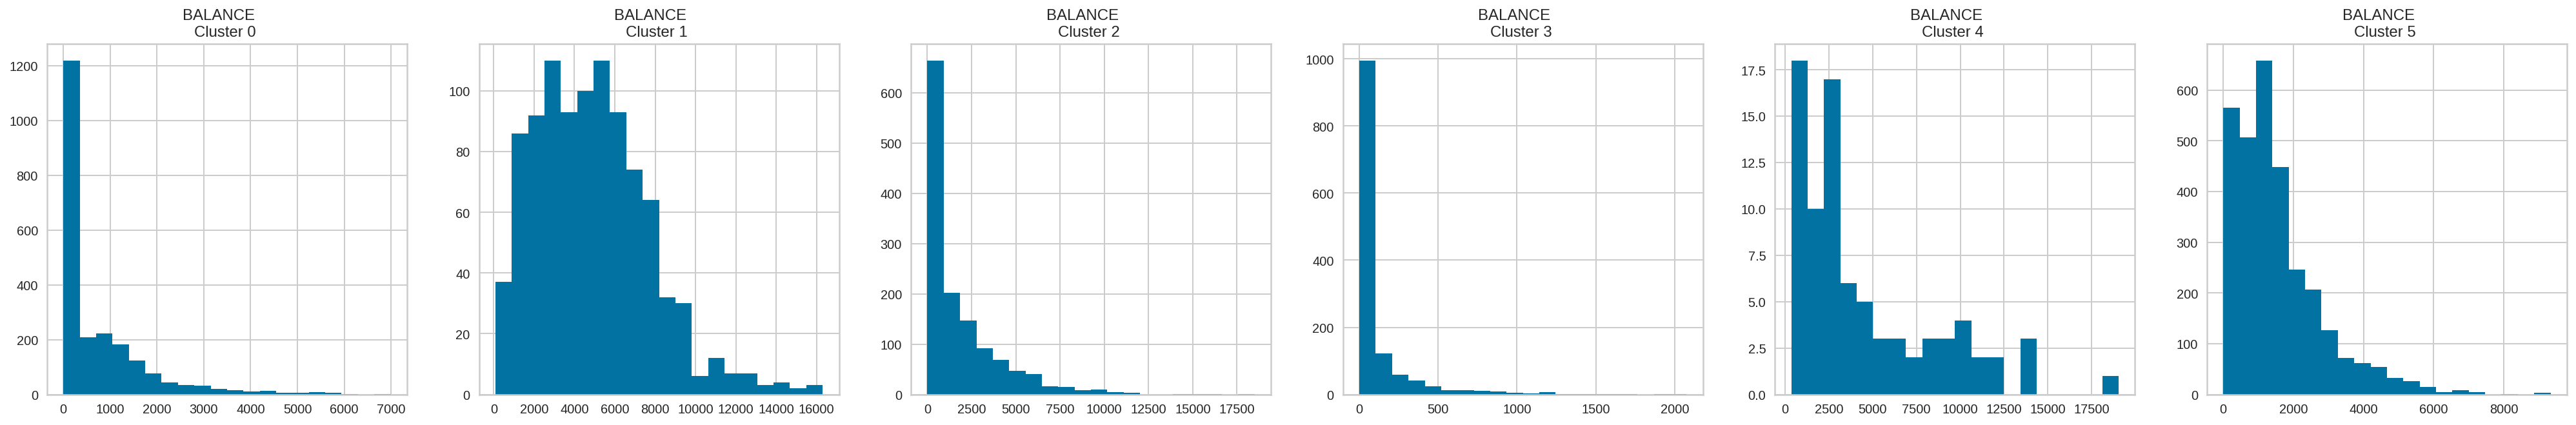

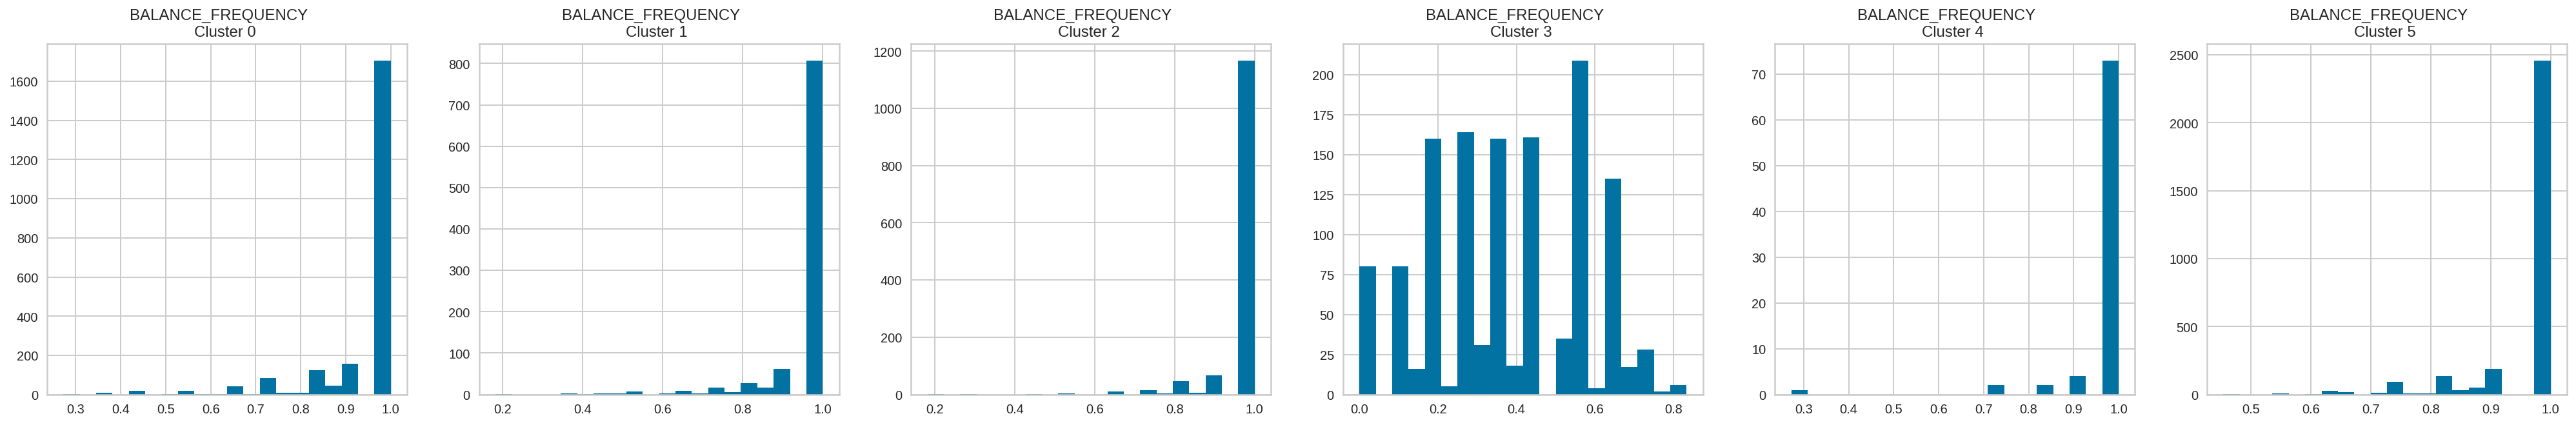

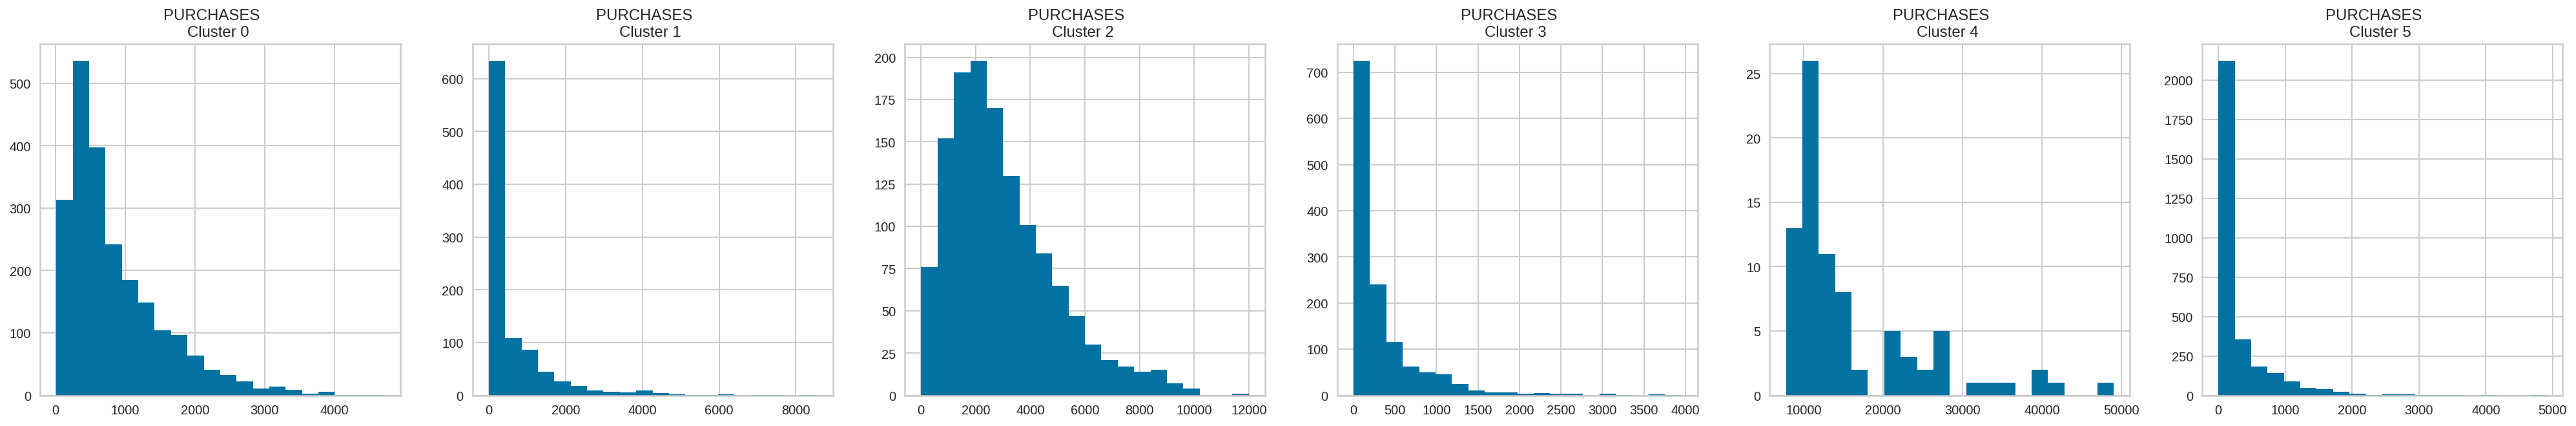

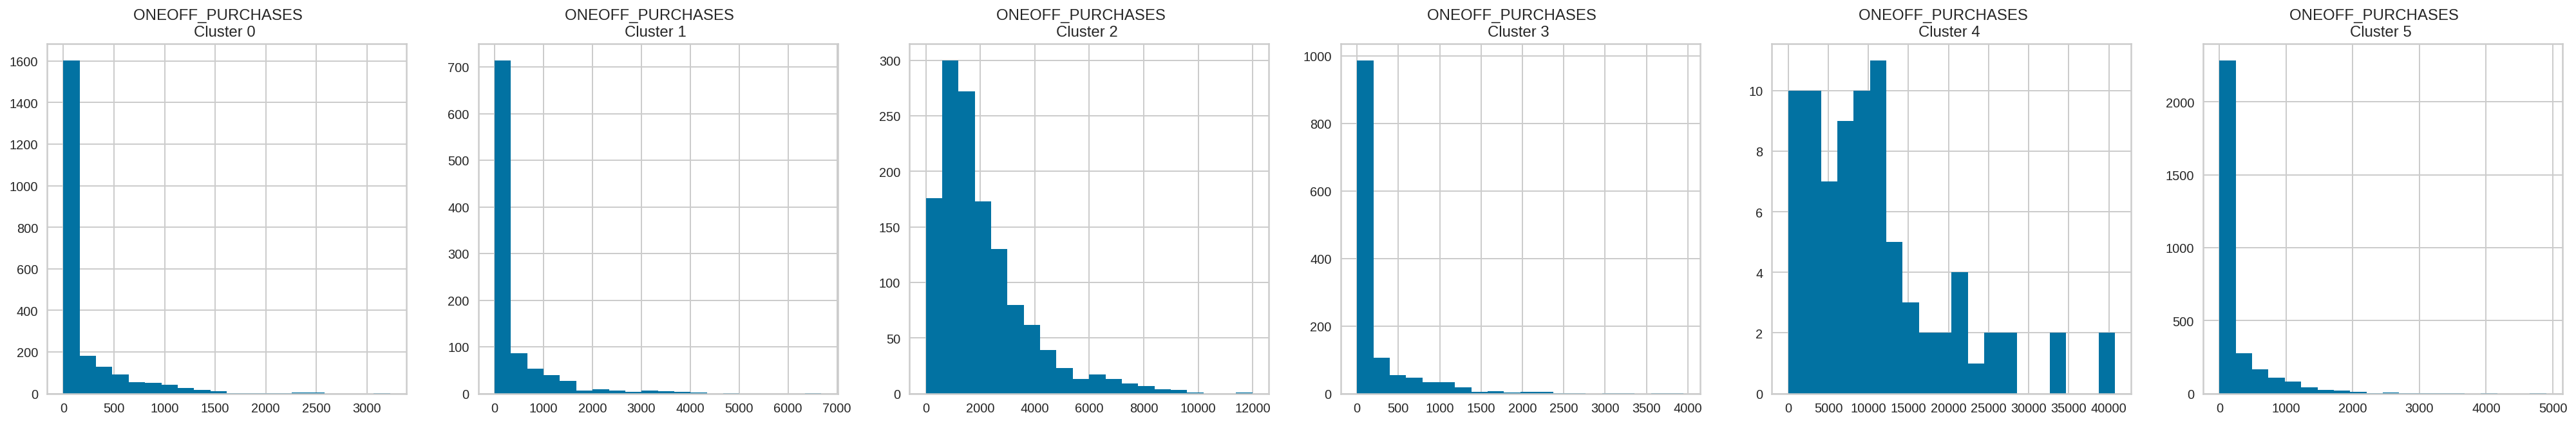

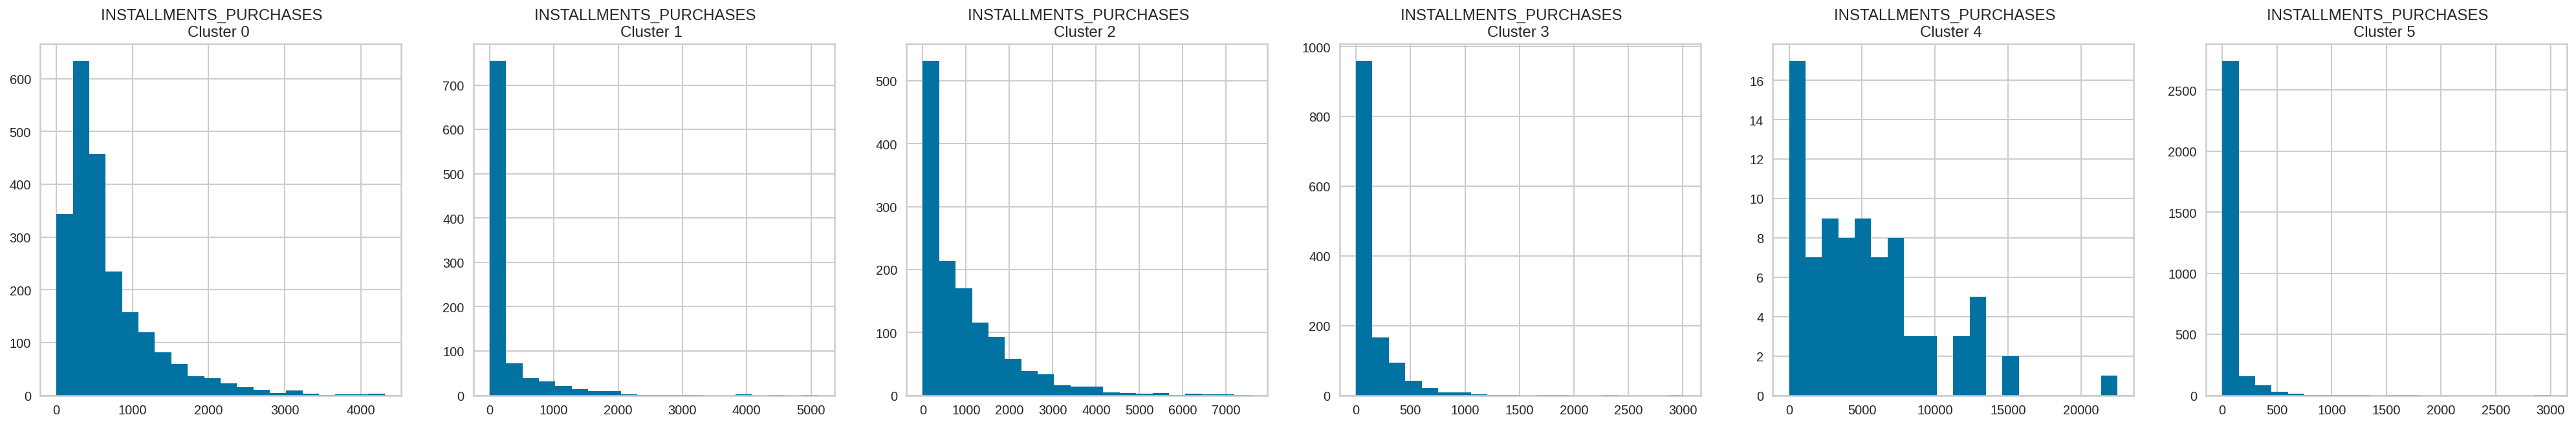

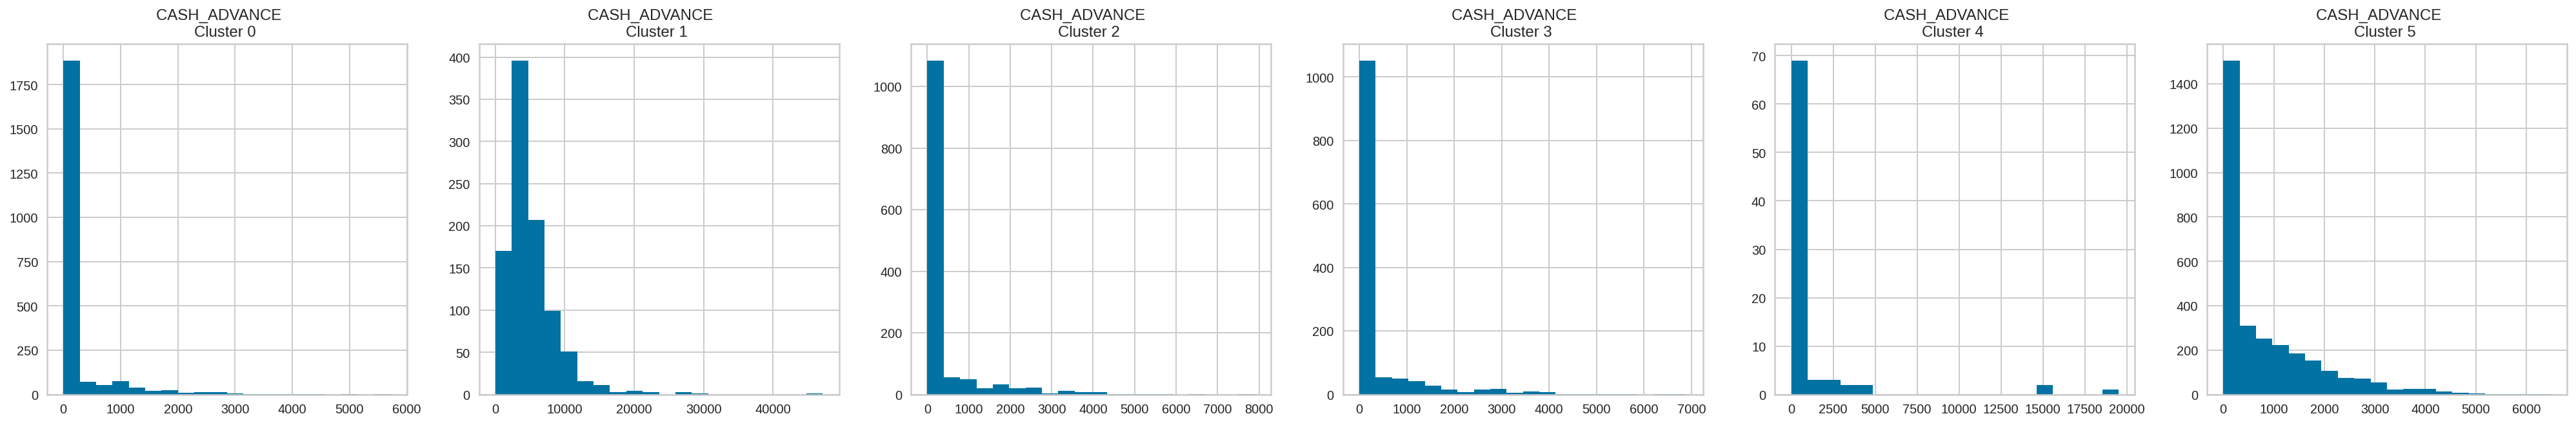

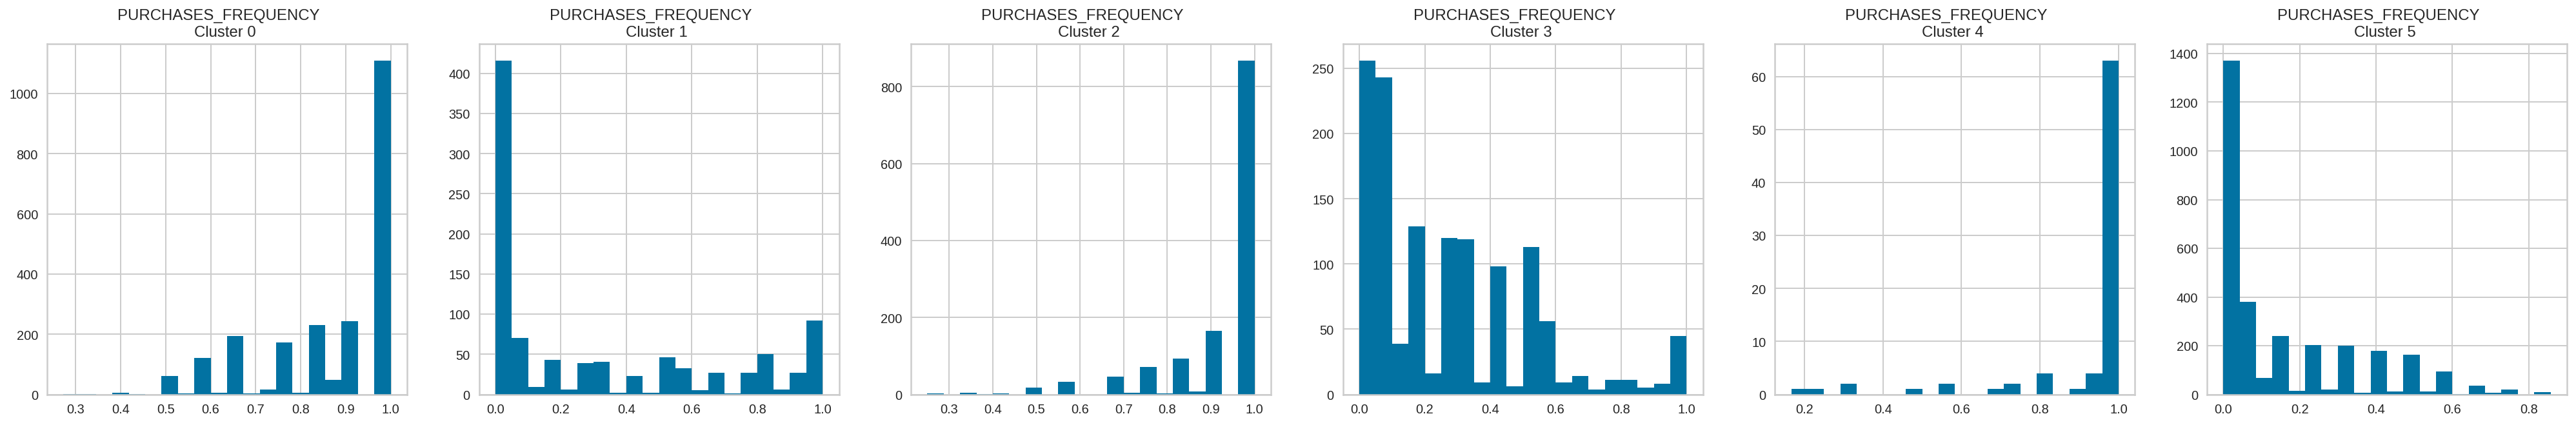

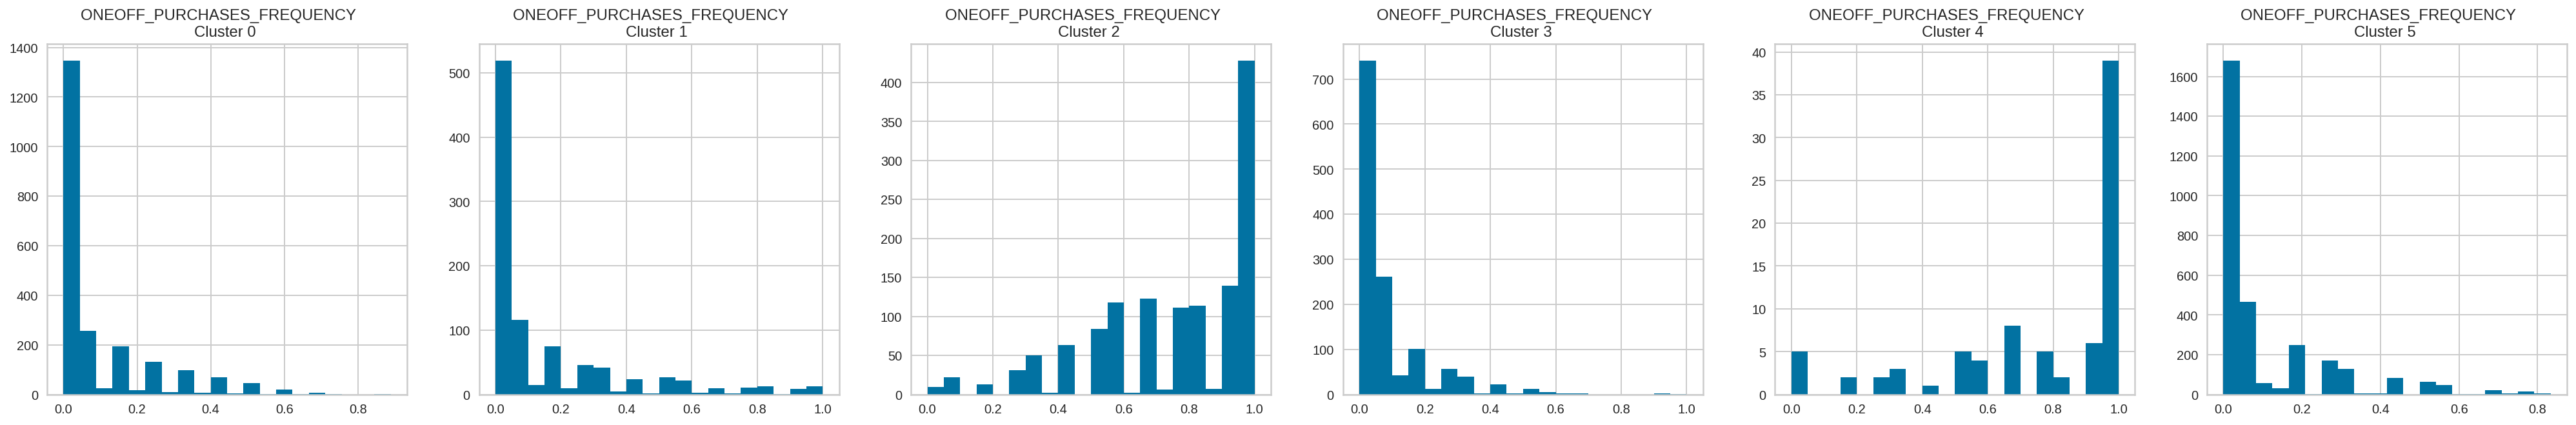

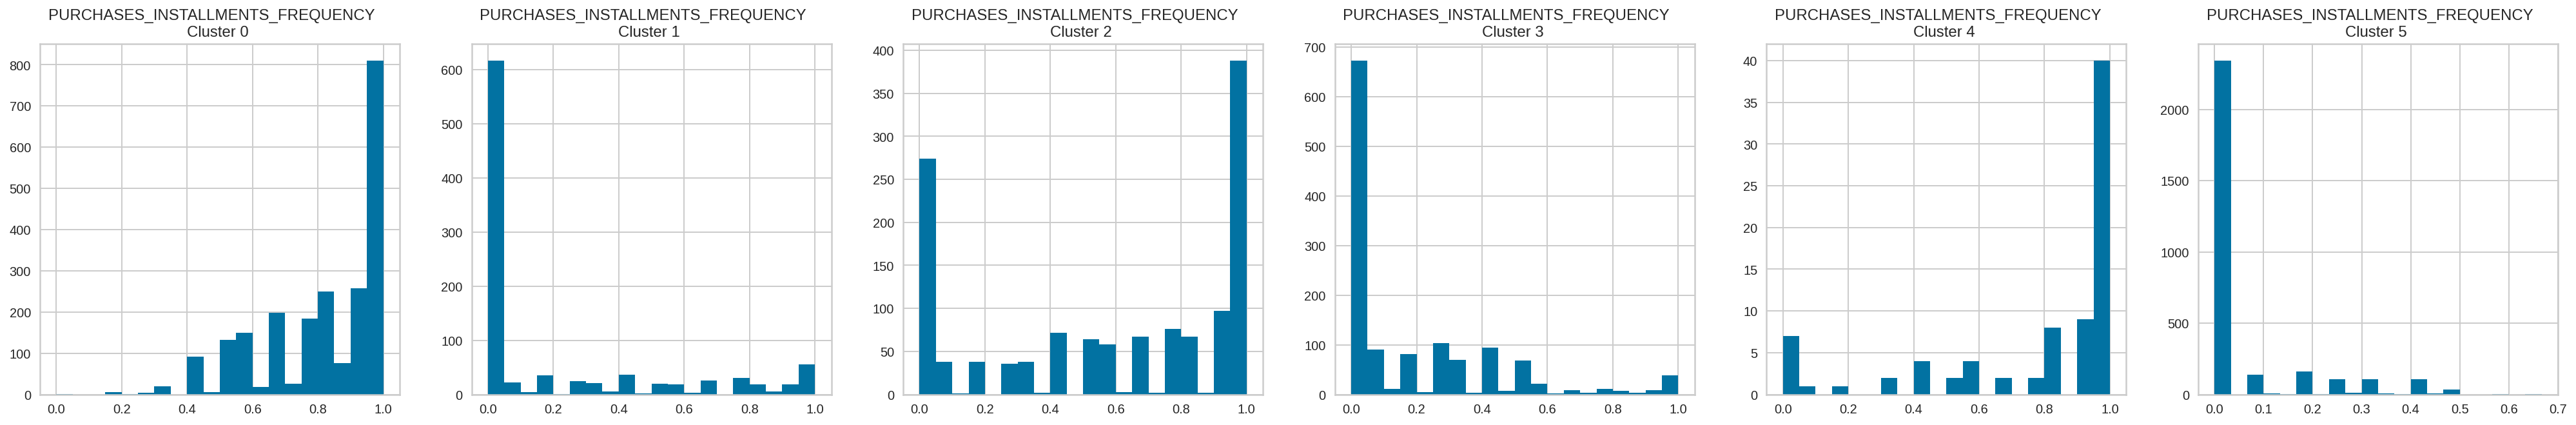

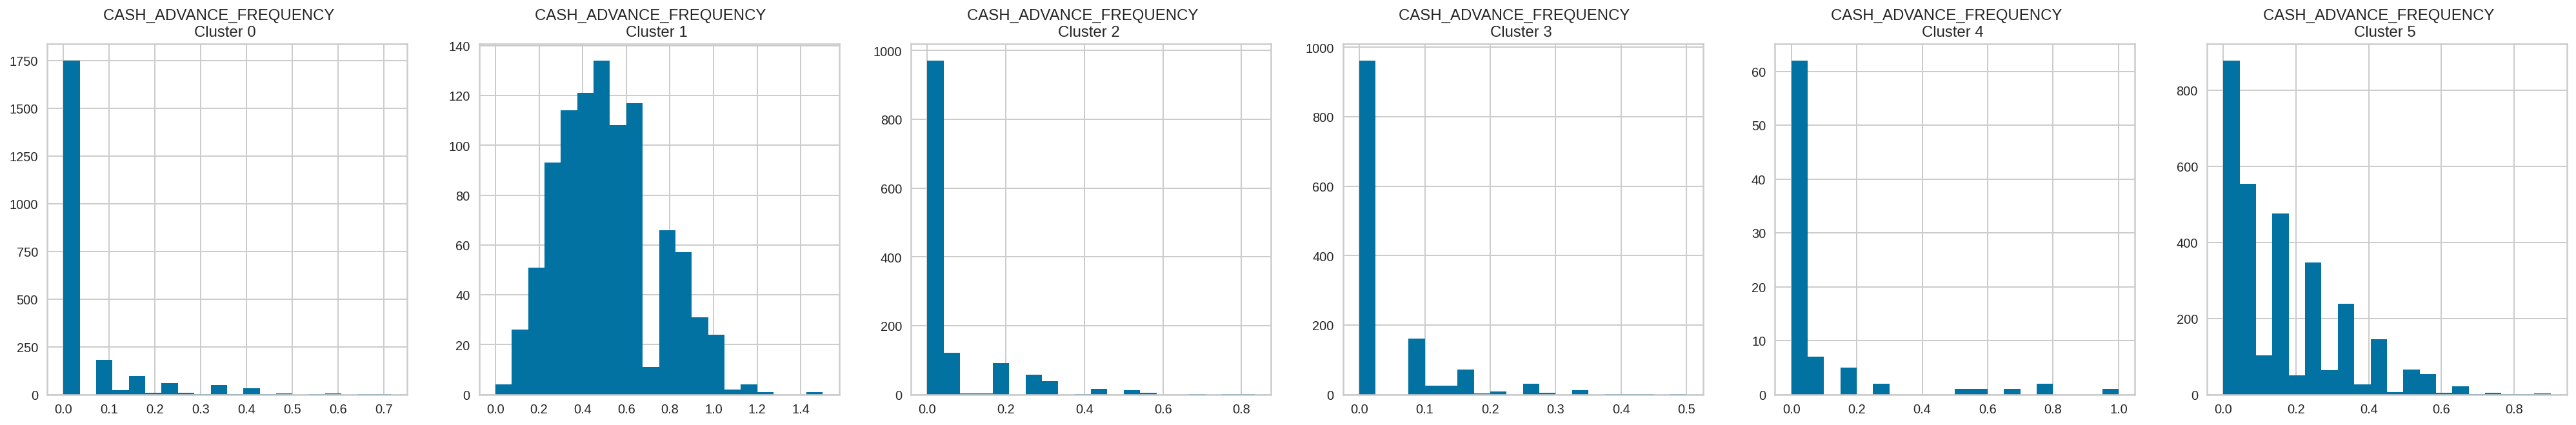

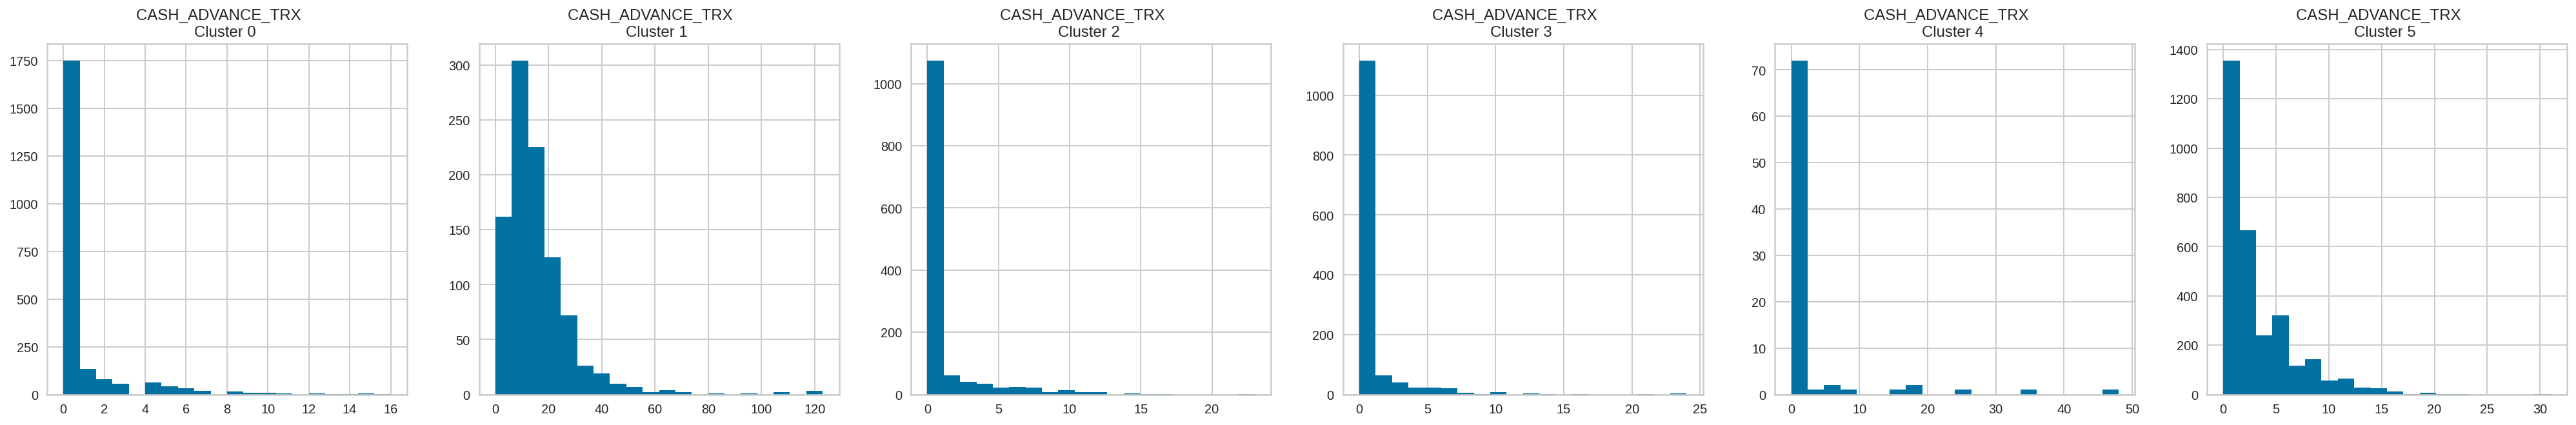

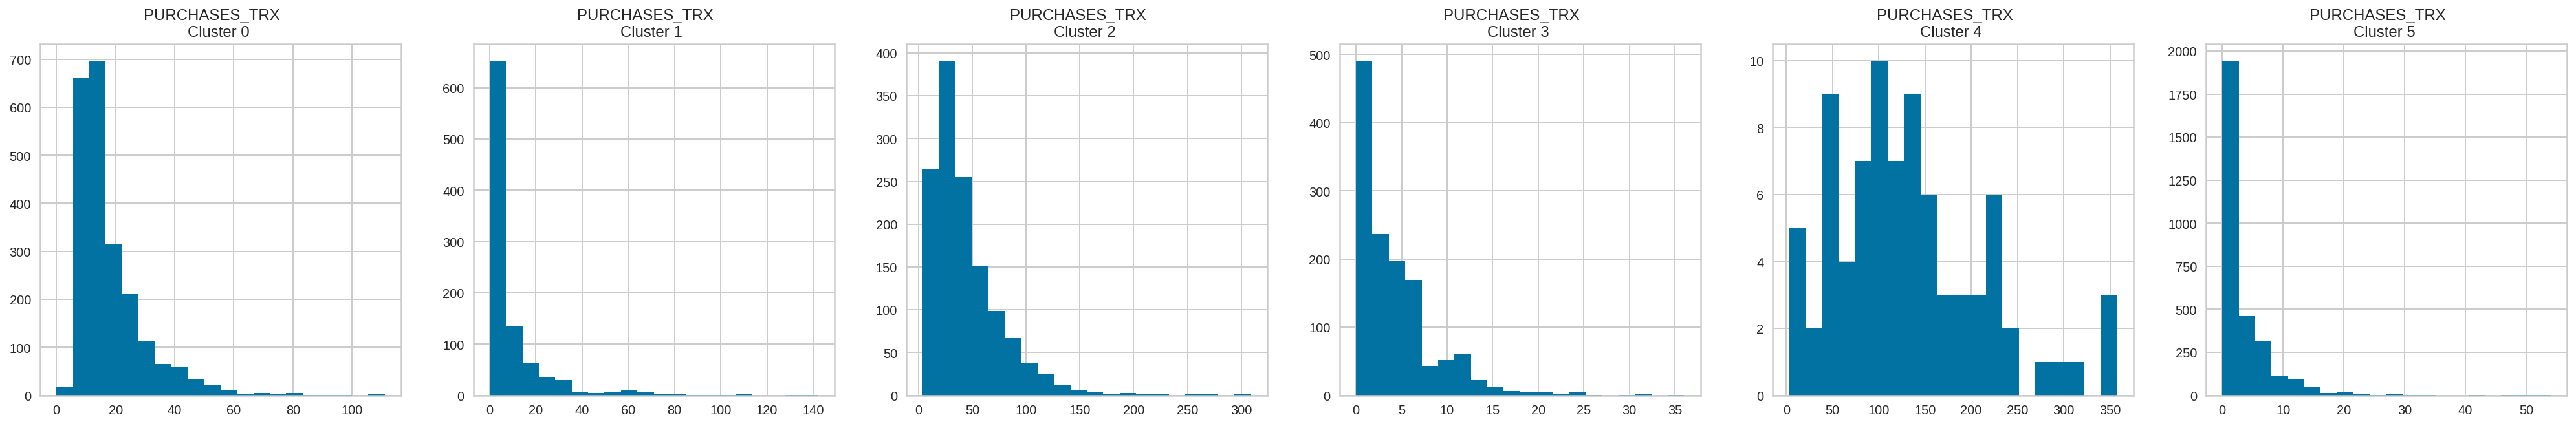

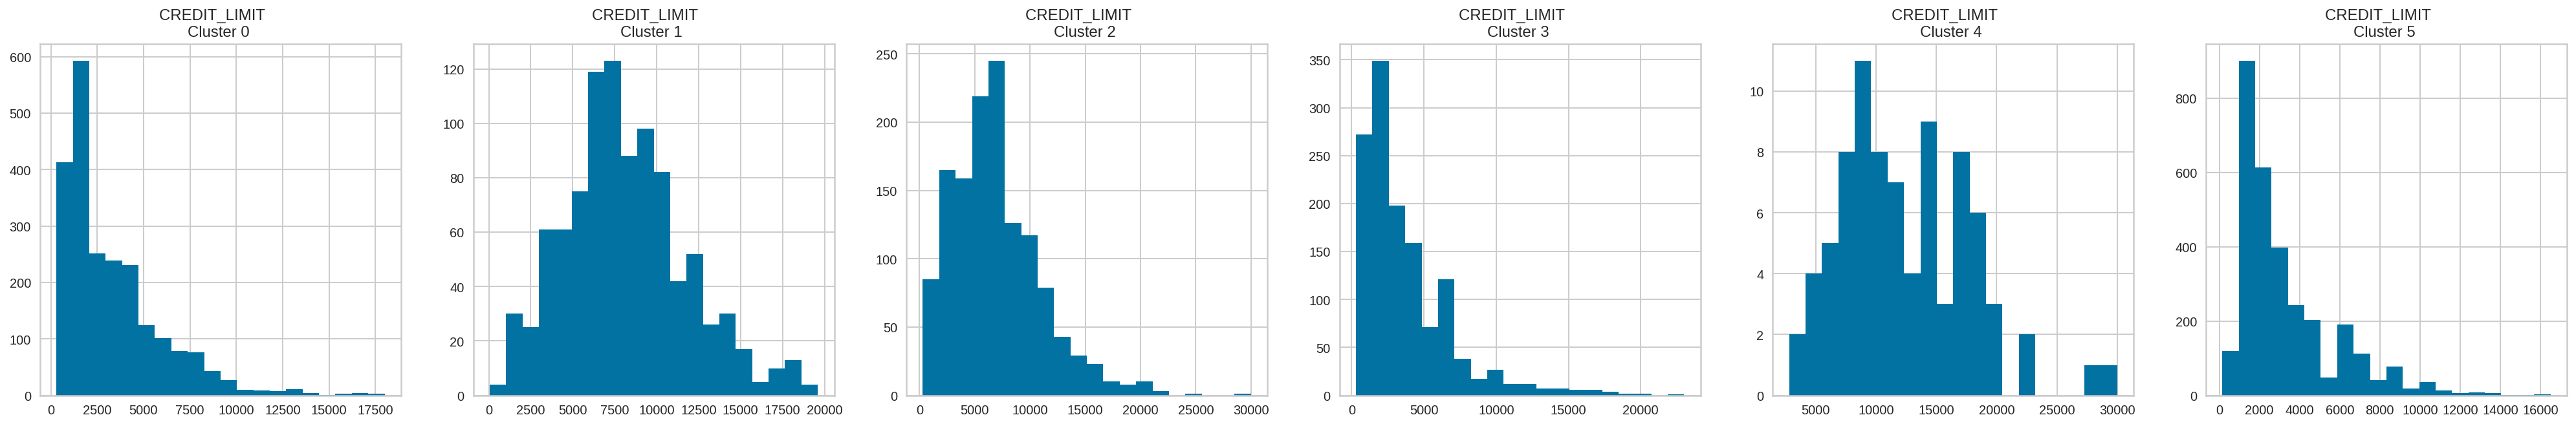

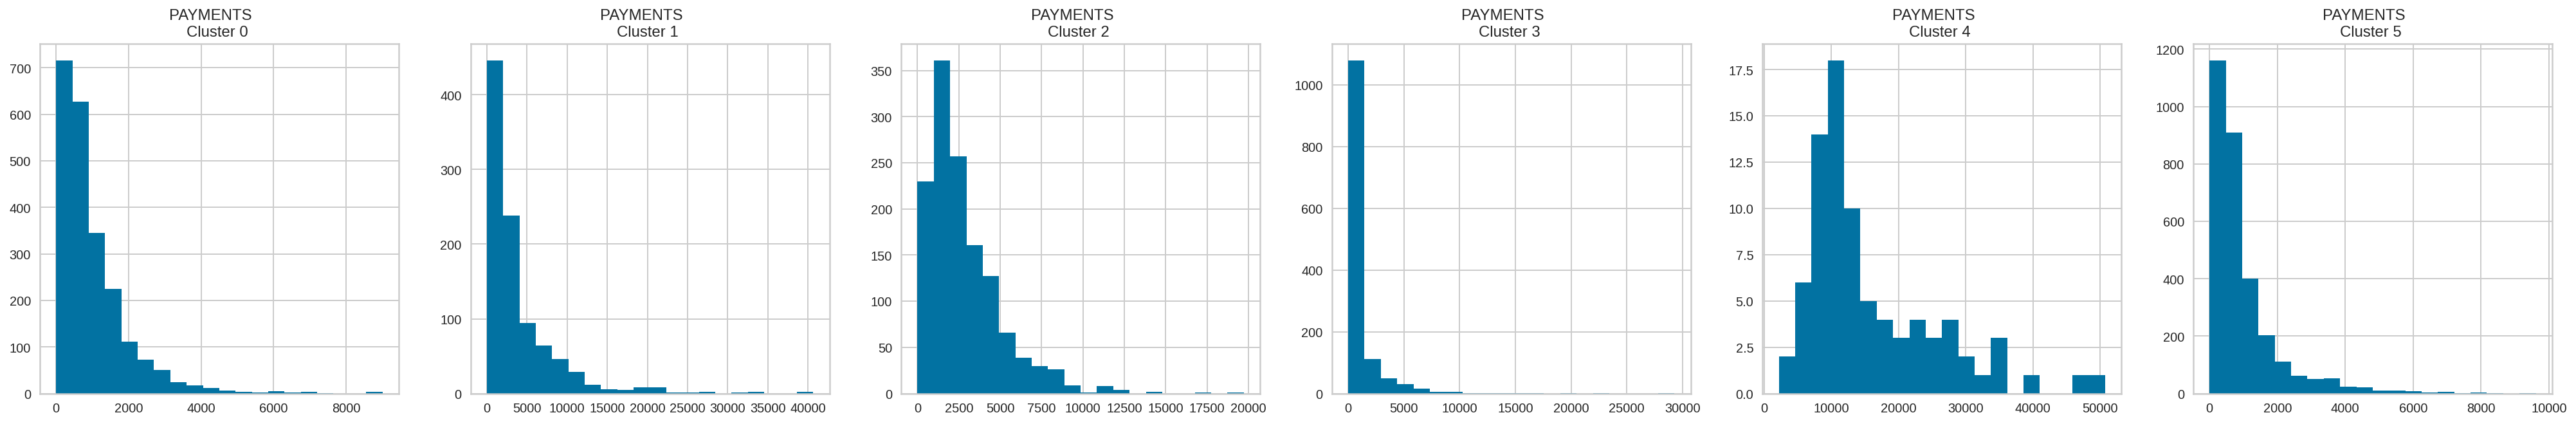

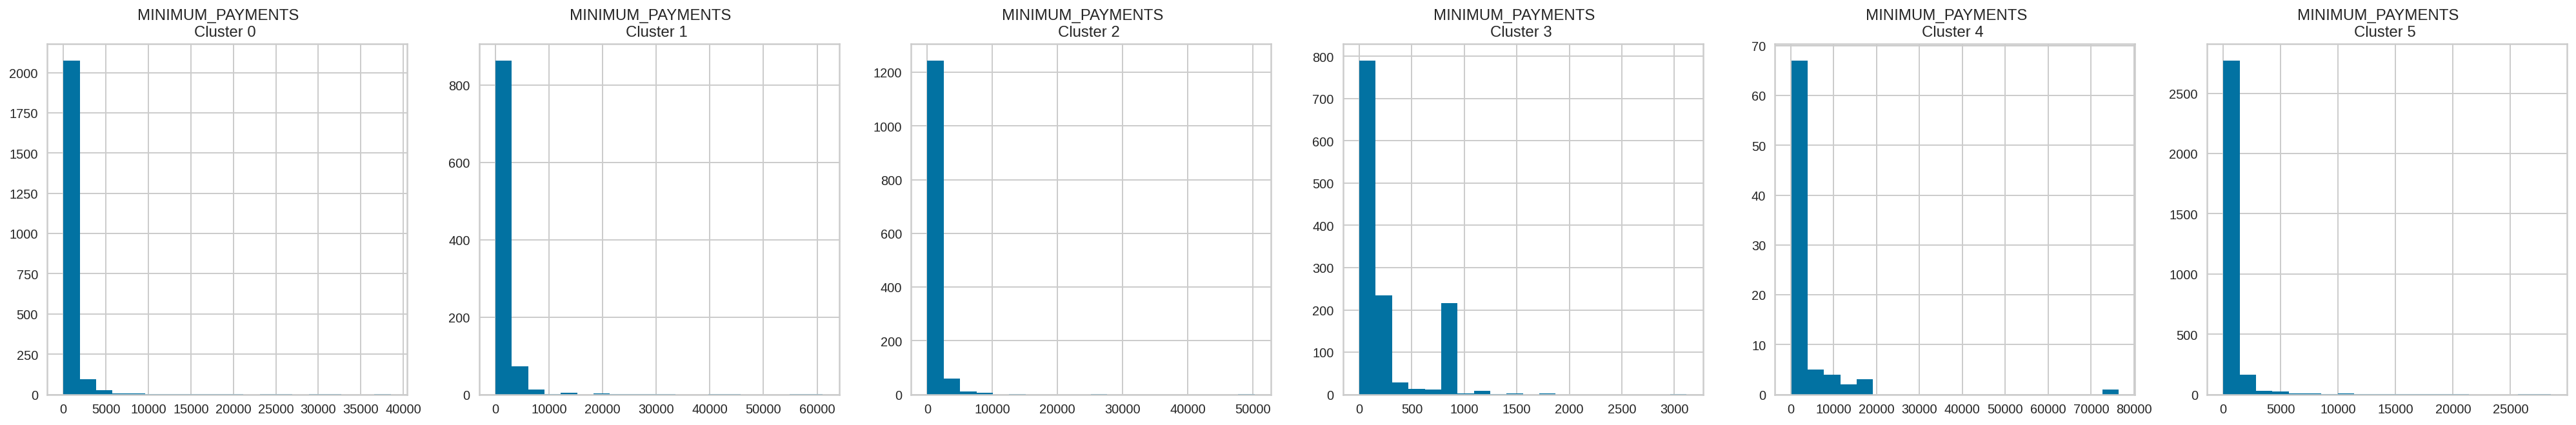

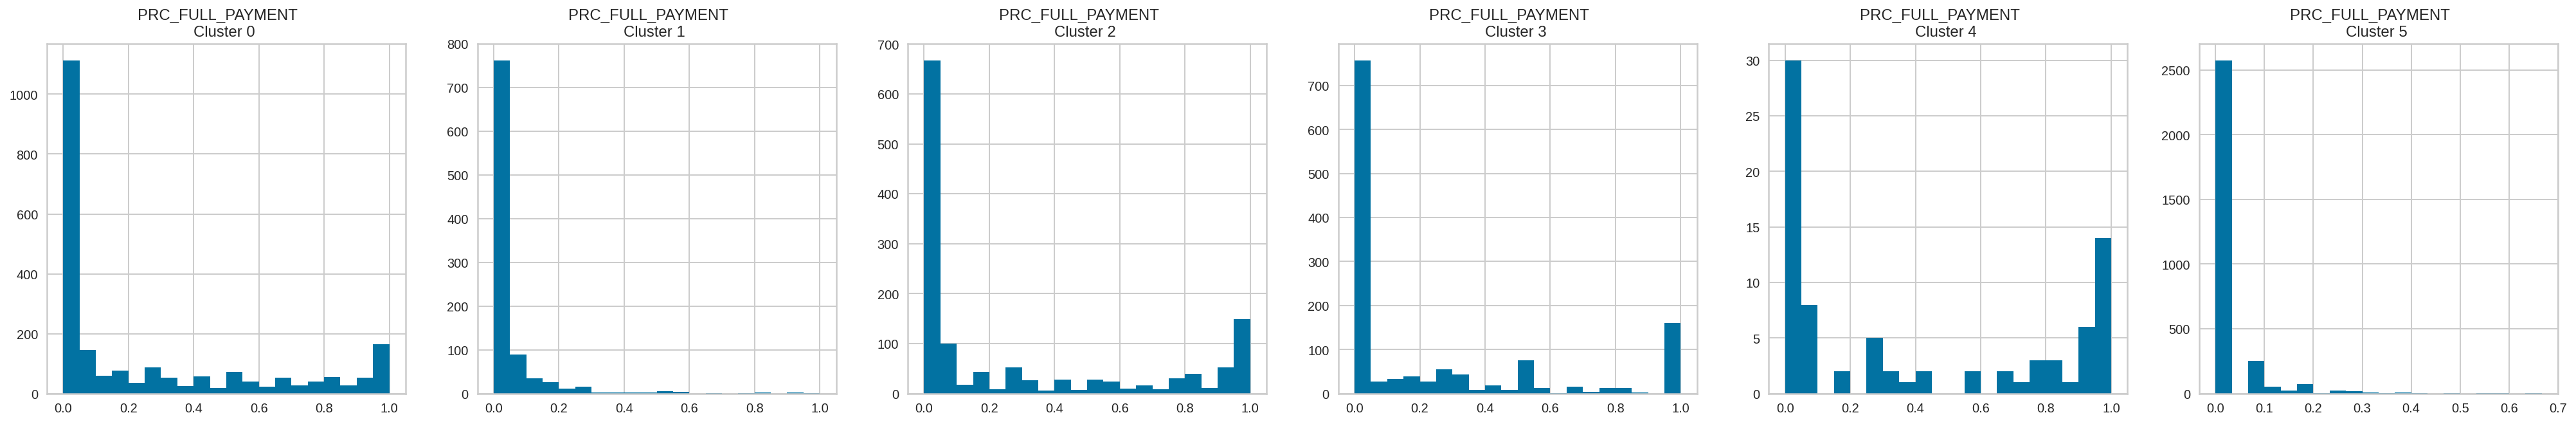

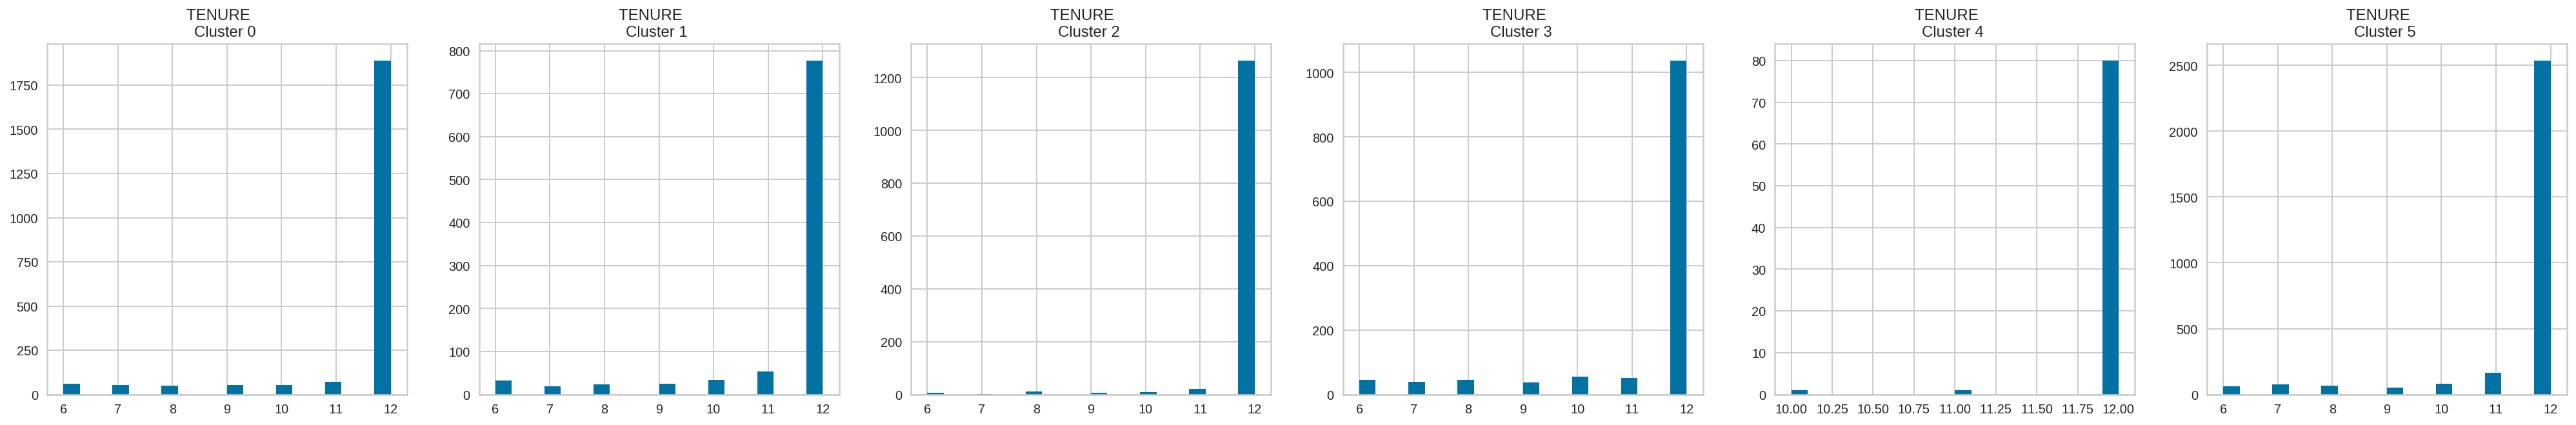

In [34]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(6):
    plt.subplot(1,6,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


### PCA

In [35]:
pca = PCA(n_components= 2)
principal_comp = pca.fit_transform(creditcard_df_cluster)
principal_comp

array([[-4326.38409121,   921.56690092],
       [ 4118.91676116, -2432.84635567],
       [ 1497.90769201, -1997.57869655],
       ...,
       [-4379.44404431,   911.50454128],
       [-4791.11787881,  1032.54096055],
       [-3623.70288545,  1555.13478669]])

In [36]:
pca_df = pd.DataFrame(data  = principal_comp, columns = ['pca1','pca2'])
pca_df.head()

pca1         pca2
0 -4326.384091   921.566901
1  4118.916761 -2432.846356
2  1497.907692 -1997.578697
3  1394.548413 -1488.743430
4 -3743.352011   757.342677

In [37]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1         pca2  cluster
0 -4326.384091   921.566901        5
1  4118.916761 -2432.846356        1
2  1497.907692 -1997.578697        2
3  1394.548413 -1488.743430        5
4 -3743.352011   757.342677        5

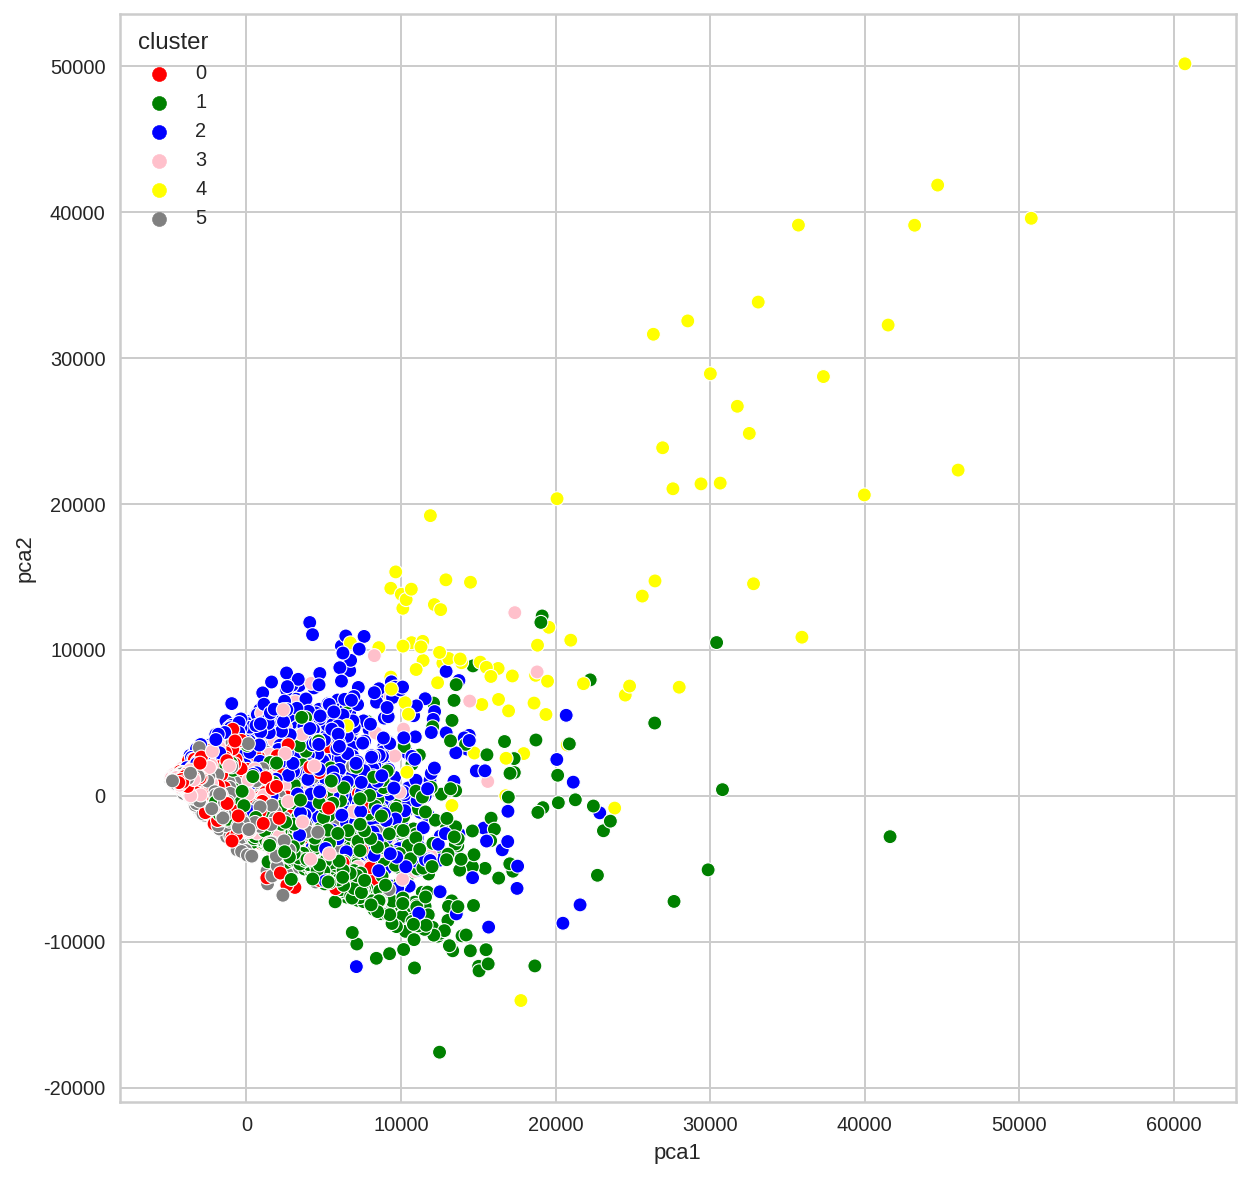

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray'])
plt.show()

### AutoEncoder

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [46]:
encoding_dim = 7 

input_df = Input(shape = (17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim , activation = 'relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [48]:
df_s.shapea

(8950, 17)

In [49]:
autoencoder.fit(df_s, df_s, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 4ms/step - loss: 0.5079
Epoch 2/25
70/70 [==============================] - 0s 4ms/step - loss: 0.2528
Epoch 3/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1957
Epoch 4/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1636
Epoch 5/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1620
Epoch 6/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1292
Epoch 7/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1163
Epoch 8/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1122
Epoch 9/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1012
Epoch 10/25
70/70 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 11/25
70/70 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 12/25
70/70 [==============================] - 0s 4ms/step - loss: 0.0802
Epoch 13/25
70/70 [==============================

In [50]:
autoencoder.save_weights('autoencoder.h5')

In [51]:
pred = encoder.predict(df_s)

280/280 [==============================] - 1s 2ms/step


In [52]:
pred.shape

(8950, 10)

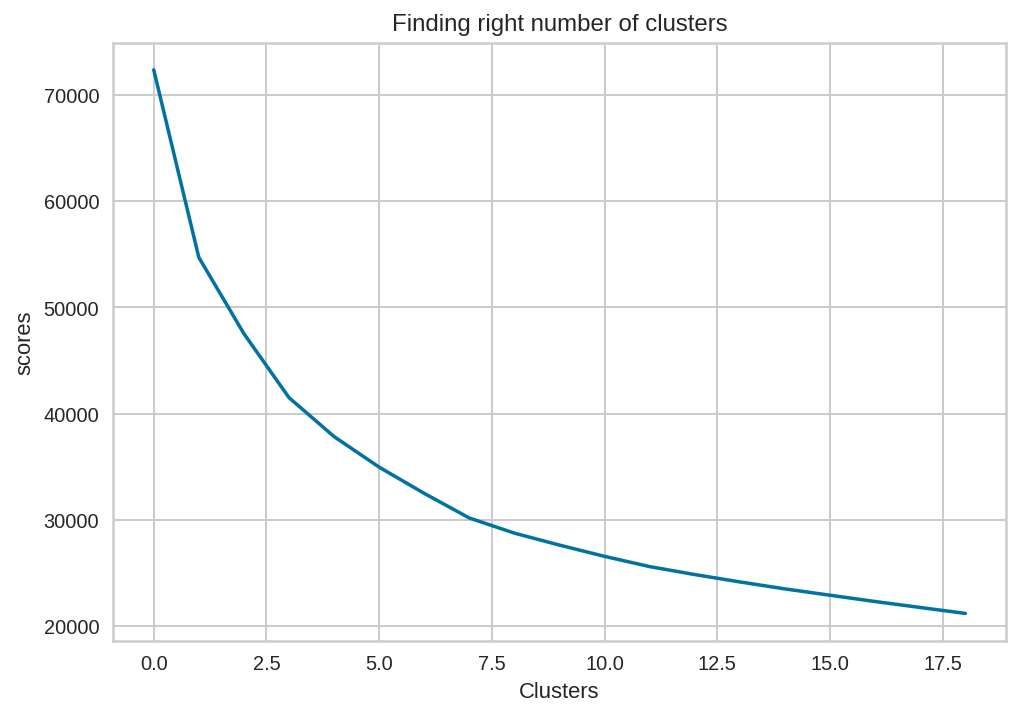

In [53]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

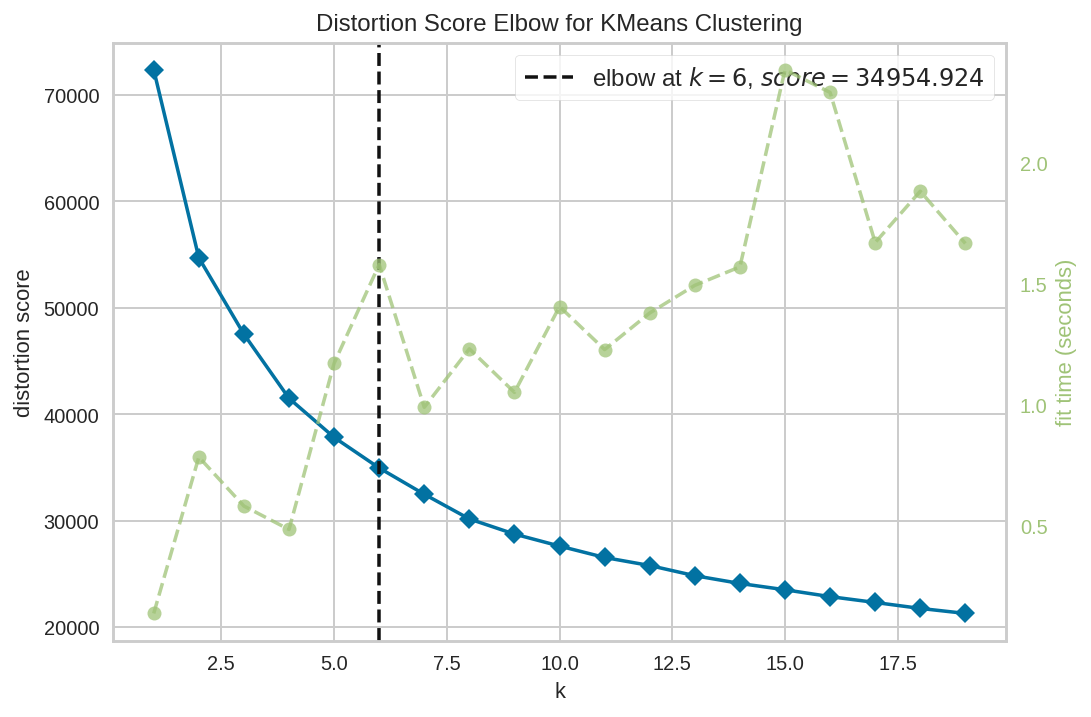

In [61]:
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(pred)       
visualizer.show()       

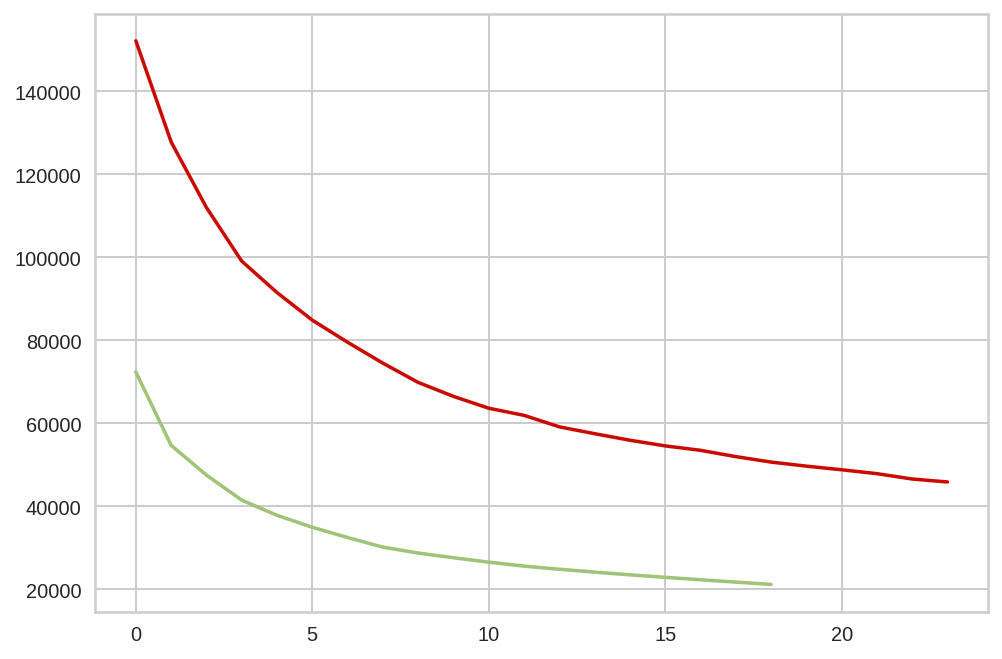

In [55]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [62]:
kmeans = KMeans(6)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_s)

In [63]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [64]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.809220 -0.269613
1 -0.472063  1.138635
2  0.179447 -0.390719
3 -1.556295 -0.366733
4 -1.798328 -0.198317

In [65]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.809220 -0.269613        0
1 -0.472063  1.138635        0
2  0.179447 -0.390719        1
3 -1.556295 -0.366733        0
4 -1.798328 -0.198317        0

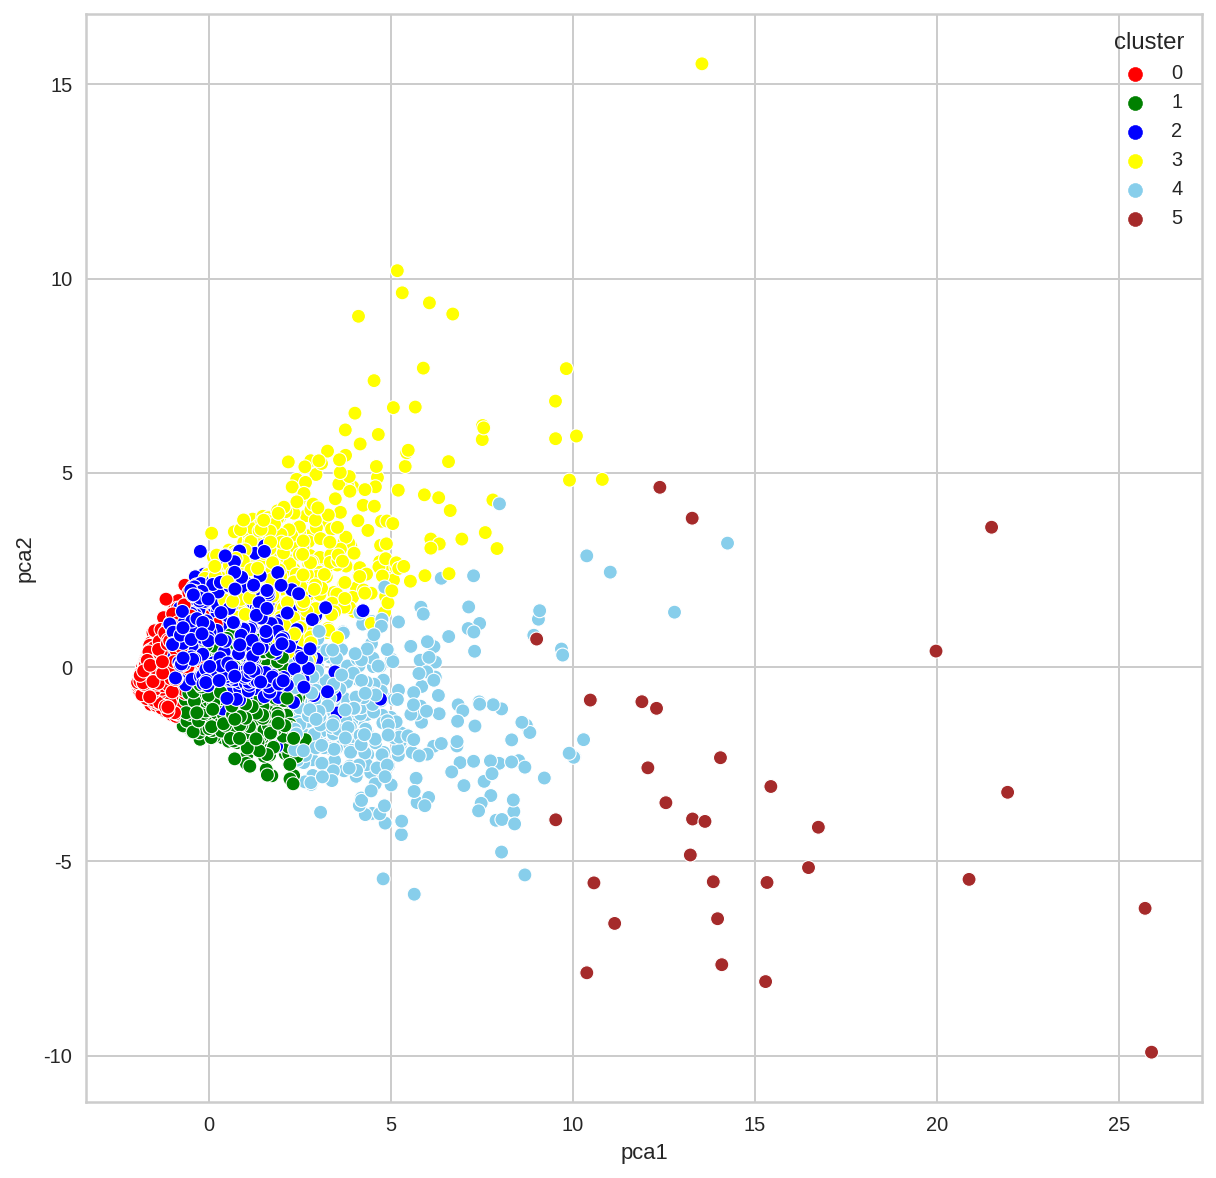

In [67]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow','skyblue','brown'])
plt.show()